<a href="https://colab.research.google.com/github/m-dergacheva/Yandex-Practicum_DA/blob/main/Yandex_%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%8B%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B8%D0%BD%D0%BE%D0%BF%D1%80%D0%BE%D0%BA%D0%B0%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Исследование данных о российском кинопрокате



**Описание:** Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. Нужно изучить рынок российского кинопроката и выявить текущие тренды  
**Цель:** выявить какие жанры\режиссеры являются наиболее популряными\прибыльными\"окупаются" по субсидиям  
**План:**
1. Сделать предобработку данных
2. Исследовать жанры которые получили высокие рейтинги, высокие сборы, наибольшее финансирование
3. Исследовать режиссеров, получившие высокие рейтинги, высокие сборы, наибольшее финансирование
4. На основе полученных данных, сделать выводы о текущих тенденциях (что интереснее зрителям, что больше получает сборов и т.д.)


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.


Цель: какие фильмы наиболее популярны?  
Гипотеза:интересны ли зрителю фильмы получившие государственную поддержку?  


In [40]:
# импорт библиотек
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import matplotlib.pyplot as plt
# из библиотеки google.colab импортируем класс files
from google.colab import files
# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

In [41]:
data_0=pd.read_csv('/content/mkrf_movies.csv') # фильмы
data_1=pd.read_csv('/content/mkrf_shows.csv') # заказы

In [124]:
print(data_0.info()) #вывод инфо о data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [125]:
print(data_1.info())#вывод инфо о data_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None


In [126]:
display(data_0.head()) #вывод первых 5 строк о data

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [47]:
display(data_1.head())#вывод первых 5 строк о data_1

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [48]:
#заменяем значения 'нет' на 0 и меняем тип
data_0.loc[data_0['puNumber']== 'нет', 'puNumber'] = 0
data_0['puNumber']=data_0['puNumber'].astype('int')

#вывод строк с 0 значением в puNumber:
#print(data_0.loc[data_0['puNumber']== 0])
#print(data_0.loc[data_0['puNumber']== 0].count())

print(data_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

При попытке поменять тип значений на int для обьединения фреймов, возникла ошибка, т.к. в столюце были значения 'нет' (невозможно преобразовать в int)  
Во всем data это единственный фильм в котором возникла такая особенность. Вероятно, в прокат фильм не вышел (ratings также с пропуском)
В последующем эту строку можно удалить

In [49]:
#соединение двух сетов с данными
data_fin=data_0.merge(data_1, on='puNumber', how='left')
display(data_fin)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
print(data_0.shape) # вывод данных о входной 1ом df
print()
print(data_1.shape)# вывод данных о входной 2ом df

(7486, 15)

(3158, 2)


In [51]:
#вывод окончательного сета
print(data_fin.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод**: обнаружены 2 data с общей колонкой puNumber (номер прокатного удостоверения). Предполагается, что значения в данном столбце являются уникальным/индификатором каждого фильма. По этой колонке было сделано объединение 2 data в 1.
Обнаружны пропуски в film_studio, production_country,director, producer, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres и box_office. В некоторых колонках ilm_studio, production_country,director, producer, пропусков не так много, но и значения восстановить невозможно - предлагается удалить строки с пропусками. По остальным колонкам - пропусков слишком много, чтобы удалять. Возможно, пропуски остануться.
По ряду колонок show_start_date и ratings необходимо скорректировать типы данных (в datetime и float соответственно)  
Исходя из данных о размерах исходящих данных, в процессе объединения данные не были утеряны.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [52]:
#перевод данных show_start_date в datetime
data_fin['show_start_date']=pd.to_datetime(data_fin['show_start_date'],format = '%Y-%m-%dT%H:%M:%S')

# вывод уникальных значений в ratings
#print(data_fin['ratings'].unique())
data_fin['ratings']=data_fin['ratings'].astype('str')
data_fin['ratings']=data_fin['ratings'].str.replace('%','') # удаление "лишних"


# переводим в тип float и для выбивающихся значений применяем условие и приводим к стандарту
data_fin['ratings']=data_fin['ratings'].astype('float')
data_fin.loc[(data_fin['ratings']>10),'ratings'] = data_fin.loc[(data_fin['ratings']>10),'ratings']/10
print(data_fin['ratings'].unique()) # проверка вывода

#проверка что обе колонки преобразовались
print(data_fin.info())

[7.2 6.6 6.8 7.7 8.3 8.  7.8 8.1 7.1 6.  7.4 5.8 8.7 6.3 6.9 5.  4.3 7.3
 7.  6.4 nan 8.2 7.5 6.7 7.9 5.9 6.2 5.6 6.5 2.4 7.6 6.1 8.6 8.5 8.8 5.5
 5.1 5.7 5.4 9.9 4.4 4.5 5.3 4.1 8.4 2.6 3.8 4.6 4.8 4.  3.  1.6 4.2 5.2
 4.7 4.9 3.9 2.7 3.3 2.9 2.8 3.7 1.4 3.1 9.7 3.5 3.2 1.5 2.1 2.5 9.2 3.4
 1.1 3.6 9.1 9.4 9.  1.9 1.  8.9 1.3 1.8 1.2 1.7 9.8]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 no

**Вывод** данные в show_start_date были переведены из object в datetime (т.к. это данные времени, и вероятнее всего они понадобятся в работе далее, и для корректной работы необходимо перевести в корректный формат)
данные в ratings были переведены в float (значения типа 99% были переведы в 9.9, т.к. предположительно при введении данных была допущена техническая ошибка).

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [53]:
print(data_fin.isna().sum()) # вывод инфо о пропусках и их кол-ве

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64


In [54]:
# создаем копию датасета до преобразования
temp = data_fin.copy()
temp.shape

(7486, 16)

Пропуск в film_studio, production_country,director,producer восстановлению не подлежит. Возможно заполнить пропуски значением - "Отсутствует". Возможно в данных строчках будут данные, которые будут являться предметом исследования.

In [55]:
#вывод кол-ва пропусков
print('Вывод кол-ва пропусков:',data_fin['film_studio'].isna().sum())

Вывод кол-ва пропусков: 18


In [56]:
display(data_fin.loc[data_fin['film_studio'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#вывод кол-ва пропусков
print('Вывод кол-ва пропусков:',data_fin['production_country'].isna().sum())

Вывод кол-ва пропусков: 2


In [58]:
display(data_fin.loc[data_fin['production_country'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [59]:
#вывод кол-ва пропусков
print('Вывод кол-ва пропусков:',data_fin['director'].isna().sum())

Вывод кол-ва пропусков: 9


In [60]:
display(data_fin.loc[data_fin['director'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


In [61]:
print('Вывод кол-ва пропусков:',data_fin['producer'].isna().sum())

Вывод кол-ва пропусков: 568


In [62]:
display(data_fin.loc[data_fin['producer'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


Заполняем пропуски в соответствии с намеченными действиями

In [63]:
#функция присваивает значения "Отсутствует", если данных в ячейке нет (Nan)
def filling_isna(row):
    test=pd.Series(row)
    return test.fillna('Отсутствует')

#применяем функцию к интересующим столбцам
data_fin['film_studio']=data_fin['film_studio'].apply(filling_isna)
data_fin['production_country']=data_fin['production_country'].apply(filling_isna)
data_fin['director']=data_fin['director'].apply(filling_isna)
data_fin['producer']=data_fin['producer'].apply(filling_isna)

#выводим "вывод" о наличии/отсутсвии пропусков после применения функции
print('Вывод кол-ва пропусков:',data_fin['film_studio'].isna().sum())
print()
print('Вывод кол-ва пропусков:',data_fin['production_country'].isna().sum())
print()
print('Вывод кол-ва пропусков:',data_fin['director'].isna().sum())
print()
print('Вывод кол-ва пропусков:',data_fin['producer'].isna().sum())

Вывод кол-ва пропусков: 0

Вывод кол-ва пропусков: 0

Вывод кол-ва пропусков: 0

Вывод кол-ва пропусков: 0


In [64]:
#вывод строк data с полученными значениями
display(data_fin[data_fin['film_studio']=='Отсутствует'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.30,"комедия,вестерн",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,Отсутствует,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Отсутствует,Отсутствует,Отсутствует,Отсутствует,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,Отсутствует,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,Отсутствует,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,Отсутствует,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,Отсутствует,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,Отсутствует,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,Отсутствует,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,Отсутствует,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,Отсутствует,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# проверка объемов потерянных данных
a, b = len(temp), len(data_fin)
print(len(temp), len(data_fin), round((a-b)/a*100, 2))

7486 7486 0.0


In [66]:
# предполагается, что если не указана информация о гос.финансировании, то её и не было вовсе. Значения заполняем 0
data_fin['nonrefundable_support']=data_fin['nonrefundable_support'].fillna(0)
print(data_fin['nonrefundable_support'].head())

data_fin['refundable_support']=data_fin['refundable_support'].fillna(0)
print(data_fin['refundable_support'].head())

0   0.00
1   0.00
2   0.00
3   0.00
4   0.00
Name: nonrefundable_support, dtype: float64
0   0.00
1   0.00
2   0.00
3   0.00
4   0.00
Name: refundable_support, dtype: float64


In [67]:
# предполагается, что если источник не Минкульт и не Фонд кино, то его нет
#print(data_fin['financing_source'].unique())

#print(data_fin.loc[(data_fin['financing_source'].isna()) & (data_fin['nonrefundable_support']!=0)])
#print(data_fin.loc[(data_fin['financing_source'].isna()) & (data_fin['refundable_support']!=0)])

data_fin['financing_source']=data_fin['financing_source'].fillna('Отсутствует')
print(data_fin['financing_source'].unique())

['Отсутствует' 'Министерство культуры' 'Фонд кино'
 'Министерство культуры, Фонд кино']


Данные по ratings и genres восстановить невозможно но их много, предлагается заполнить genres аналогично film_studio, т.к. данные по genres еще понадобятся, столбце ratings оставить пропуски как есть, т.к. если поставить 0 - это возможно не соответствует действительности, и сильно исказит данные, если поставить "Отсутствует", то в выводах необходимо будет каждый раз фильтровать данные. При наличии пропусков, имеющаяся информация будет учтена, но и сильно данные искажены не будут

In [68]:
print('Вывод кол-ва пропусков:',data_fin['genres'].isna().sum()) #вывод "до" преобразования кол-во пропусков
data_fin['genres']=data_fin['genres'].fillna('Отсутствует')
print('Вывод кол-ва пропусков:',data_fin['genres'].isna().sum()) #вывод "после" преобразования кол-во пропусков

Вывод кол-ва пропусков: 976
Вывод кол-ва пропусков: 0


In [70]:
print(data_fin.isna().sum()) # вывод инфо о пропусках и их кол-ве

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                   7154
financing_source            0
ratings                   967
genres                      0
box_office               4328
dtype: int64


**Вывод** Обнаружны пропуски в film_studio, production_country,director, producer, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres и box_office. В некоторых колонках film_studio, production_country,director, producer, пропусков не так много, но и значения восстановить невозможно - предлагается заполнить пропуски значением Отсутствует, т.к. данные ещё пригодятся.
Предположительно, что если гос поддержки не было, то пропуски можно заполнить значениями 0 в nonrefundable_support и refundable_support.
Предположительно, что если гос поддержки нет, то и в financing_source также будет значение Отсутствует (пропуски были устранены)
Пропуски в budget составляют почти весь data, поэтому удалить такие данные невозможно, но и заполнить невозможно( считаю, что бюджет фильма может и в большинстве своем состоит не только из гос поддержки, но и из частных "вливаний". Поэтому заполнять бюджет суммой значений гос поддержки считаю не совсем корректным). Прийдется оставить как есть.
Также в части в box_office  
Данные по ratings и genres восстановить невозможно. Если genres возможно заполнить по типу film_studio, то ratings нет.В ratings предлагается оставить пропуски как есть, т.к. если поставить 0 - это возможно не соответствует действительности, и сильно исказит данные. При наличии пропусков, имеющаяся информация будет учтена, но и сильно данные искажены не будут

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [71]:
#проверка на наличие дубликатов по номеру
data_fin.duplicated(subset=['puNumber']).sum()
display(data_fin.loc[data_fin.duplicated(subset=['puNumber'])])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,7.60,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,6.80,"комедия,криминал",NaN


Т.к. в puNumber указаны прокатные удостоверения которые могли быть выданы под разные цели, предлагается оставить данные как есть (тем более что в здаании нет цели исследовать прокатные удостоверения)

In [72]:
data_fin.duplicated(subset=['puNumber','title']).sum()

0

Дубликатов в связке номер прокатного удостоверения и названия фильма не обнаружено и у этих фильмов имеются значения рейтингов и жанров, что может потребоваться для анализа

In [73]:
data_fin.duplicated(subset=['director','production_country']).sum()
data_fin.loc[data_fin.duplicated(subset=['director','production_country','show_start_date'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
29,"Плюмбум, или Опасная игра",111014116,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Отсутствует,«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,6.90,драма,NaN
31,Охота на лис.,111013916,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Отсутствует,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,7.10,"драма,криминал",NaN
87,Взрослые дети.,111013013,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Азаров,Отсутствует,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Отсутствует,7.80,"драма,комедия",NaN
93,Васса,111012913,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Панфилов,Отсутствует,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Отсутствует,7.90,драма,NaN
100,Время желаний,111013313,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Райзман,Отсутствует,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,7.30,"драма,мелодрама","2,890.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7397,Фабрика грёз (оригинальная версия),121034419,2019-11-28 12:00:00+00:00,Художественный,"Траумфабрик Бабельсберг, Тобис Фильм, Телепул,...",Германия,Мартин Шрейер,"Кристоф Фиссер, Том Циклер",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,NaN,Отсутствует,NaN
7403,Сын полка,111020219,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,Отсутствует,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,7.00,"драма,военный",NaN
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,Отсутствует,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Отсутствует,7.00,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,Отсутствует,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,7.00,военный,NaN


Обнаруженные дубликаты по дате, режиссеру и стране происхождения - разные фильмы с разным удостоверением проката. Удалять их не имеет смысла.

In [74]:
# Комментарий ревьюера 2
temp.duplicated().sum()

0

In [75]:
# Комментарий ревьюера
temp.duplicated(subset=['puNumber']).sum()

2

In [76]:
print(data_fin['title'].duplicated().sum())

714


In [77]:
display(data_fin[data_fin['title'].duplicated()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,6.40,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,7.70,"фэнтези,приключения,семейный","759,526.00"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,8.20,"фэнтези,приключения,семейный","1,125,302.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"триллер,криминал,детектив",NaN


**Вывод** обнаружены дубликаты в puNumber.Дубликат возможно произошле по технической ошибке из-за двойной записи данных (или человеческой, при случайном копировании). Дубликаты в puNumber для разных фильмов мог произойти по причине выдачи таких прокатных удостоверений для разных целей (и такие удостоверения могли совпасть). Есть дубликаты по названию фильма title, но удаление таких данных, при условии разных значений в puNumber (там дубликатов больше не обнаружено), влечет потерю данных, т.к. возможно фильмы показывались иным способом (по ТВ, в кинотеатре и т.д.), возможно были выпущены ремейки и т.д. (т.е. в любом случае, это разные фильмы с одиннаковыми наименованиями)

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

In [78]:
# вывод уникальных значений колонки type
print(data_fin['type'].unique()) # проверка вывода

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']


In [79]:
# вывод кол-ва уникальных значений в type
temp['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [80]:
#обработка данных функцией во всех категориальных столбцах (везде удаляем пропуски вначале и в конце)
def strip_names(cell):
    return cell.strip()

data_fin['type']=data_fin['type'].apply(strip_names)
data_fin['production_country']=data_fin['production_country'].apply(strip_names)
data_fin['director']=data_fin['director'].apply(strip_names)
data_fin['genres']=data_fin['genres'].apply(strip_names)
data_fin['title']=data_fin['title'].apply(strip_names)
data_fin['producer']=data_fin['producer'].apply(strip_names)
data_fin['age_restriction']=data_fin['age_restriction'].apply(strip_names)
data_fin['film_studio']=data_fin['film_studio'].apply(strip_names)
data_fin['financing_source']=data_fin['financing_source'].apply(strip_names)

In [81]:
#проверка корректности результата
print(data_fin['type'].value_counts())
print()
print(data_fin['production_country'].value_counts())
print()
print(data_fin['director'].value_counts())
print()
print(data_fin['genres'].value_counts())
print()
print(data_fin['age_restriction'].value_counts())
print()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

США                                                                    2175
Россия                                                                 1821
СССР                                                                    377
Франция                                                                 302
Великобритания                                                          259
                                                                       ... 
Франция - Германия - Турция - Катар                                       1
Франция-Китай                                                             1
Россия, Германия, Великобритания                                          1
Великобритания - Италия - Испания                                         1
Дани

In [82]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     7486 non-null   float64            
 10  nonrefundable_support  7486 non-null   float64            
 11  budget                 332 non-null    float64          

In [83]:
display(data_fin.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Отсутствует,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Отсутствует,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN


**Вывод** В колонке type были обнаружены лишние пробелы. Пробелы удалены.  
При этом во всех данных обнаружена разная запись однородной информации, например в director некоторые имена были указаны например И.Иванов, а другие Вася Васечкин. Аналогично в producer.
В title помимо названия могут быть вписаны "уточняющие данные" не предусмотренные графой, например Превосходство Борна /По одноименной новелле ...
По всем категориальным данным была произведена корректировка по удалению лишних пробелов вначале и в конце значения

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

In [86]:
# вывод фильмов, у которых budget меньше значения refundable_support+nonrefundable_support
#print(data_fin.loc[(data_fin['budget']<data_fin['refundable_support']+data_fin['nonrefundable_support'])])
#print(data_fin.loc[(data_fin['budget']<data_fin['refundable_support']+data_fin['nonrefundable_support'])].count())

# удаляем некорректные строки и вывод результата
data_fin=data_fin.loc[~(data_fin['budget']<data_fin['refundable_support']+data_fin['nonrefundable_support'])]
print(data_fin.loc[(data_fin['budget']<data_fin['refundable_support']+data_fin['nonrefundable_support'])].count())

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64


In [87]:
# Комментарий ревьюера
a, b = len(temp), len(data_fin)
print(len(temp), len(data_fin), round((a-b)/a*100, 2))

7486 7468 0.24


In [88]:
print(data_fin['box_office'].value_counts())
print()
print(data_fin['box_office'].isna().sum())

0.00             24
200.00           13
300.00           12
360.00            9
400.00            8
                 ..
2,060,823.00      1
1,544,985.50      1
322,284.00        1
30,701,345.40     1
219,569.00        1
Name: box_office, Length: 2921, dtype: int64

4327


In [89]:
display(data_fin.loc[data_fin['box_office']==0])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,Отсутствует,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Отсутствует,7.70,"драма,биография,музыка",0.00
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,Отсутствует,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,8.20,драма,0.00
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,6.30,комедия,0.00
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,6.50,"драма,военный,история",0.00
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,7.40,"аниме,мультфильм,драма",0.00
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,7.70,"аниме,мультфильм,фантастика",0.00
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,7.90,биография,0.00
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,5.50,"комедия,мелодрама",0.00
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,5.80,"мелодрама,комедия,драма",0.00
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",Германия - Бельгия - США -Франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,6.90,драма,0.00


In [90]:
data_fin['box_office'].describe()

count           3,141.00
mean       76,009,674.78
std       240,250,266.23
min                 0.00
25%            83,950.00
50%         2,284,862.00
75%        23,441,120.00
max     3,073,568,690.79
Name: box_office, dtype: float64

In [91]:
data_fin['ratings'].describe()

count   6,502.00
mean        6.49
std         1.11
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.90
Name: ratings, dtype: float64

In [92]:
data_fin['budget'].describe()

count             315.00
mean      134,096,082.35
std       191,226,039.63
min        14,462,464.00
25%        46,153,866.50
50%        73,379,554.00
75%       150,004,286.50
max     2,305,074,303.00
Name: budget, dtype: float64

In [93]:
data_fin['nonrefundable_support'].describe()

count         7,468.00
mean      2,029,153.57
std      15,630,858.10
min               0.00
25%               0.00
50%               0.00
75%               0.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

In [94]:
data_fin['refundable_support'].describe()

count         7,468.00
mean        489,421.53
std       5,660,541.02
min               0.00
25%               0.00
50%               0.00
75%               0.00
max     180,000,000.00
Name: refundable_support, dtype: float64

**Вывод** столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.
Отмечено, что данные в budget имеются только для тех, которые имеют государственную поддержку (и данные только по таким фильмам есть в financing_source). Предполагается, что не может быть, что при бюджете 0, гос поддержка составила более 0 руб. Такие строки в data предлагается удалить  
Т.к. по условиям прокатные удостоверения выдаются для разных целей, то возможно 0 в box_office - означает не провальный прокат, а прокат по ТВ, что вероятно не может "собрать" со зрителей суммы с просмотра ( в пользу теории, в списке есть фильмы, которые точно вышли раньше даты проката (например, где страна создания СССР), и сумма сборов равна 0).  
В слобце рейтингов ошибок не обнаружено  
В столбцах с бюджетом и финансированием гос поддержки - имелось множество пропусков, которые были заполнены значениями, по возможности. Но в целом, такие значения невозможно предсказать\предположить\заполнить медианными\ср.ариф значениями, т.к. бюджет мб разный и каждый случай индивидуальный

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [95]:
#создание столбца с годом проката
data_fin['year']=data_fin['show_start_date'].dt.year
display(data_fin.head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Отсутствует,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Отсутствует,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN,2015
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Отсутствует,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Отсутствует,7.70,драма,NaN,2016
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Отсутствует,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,8.30,"мелодрама,комедия","2,700.00",2013
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.60,"мюзикл,мелодрама,комедия",NaN,2014
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,8.00,"комедия,криминал",NaN,2016
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,Отсутствует,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,7.80,"мелодрама,комедия",NaN,2014


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Создание двух столбца: с именем и фамилией главного режиссёра и основным жанром фильма.   В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [96]:
#выделение первых значений в колонках и передачи таких значений в новые колонки с главными режиссерами и жанрами
def split_names(cell):
    return cell.split(',')[0]

data_fin['main_director']=data_fin['director'].apply(split_names)
data_fin['main_genre']=data_fin['genres'].apply(split_names)
display(data_fin.tail(15))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
7471,Реальная любовь в Нью-Йорке,121038219,2019-12-19 12:00:00+00:00,Художественный,"Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Дан...",Дания - Канада - Швеция - Франция - Германия -...,Лоне Шерфиг,"Малене Бленков, Сандра Каннингэм",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,6.10,драма,"3,143,790.50",2019,Лоне Шерфиг,драма
7472,Черное Рождество,121038319,2019-12-19 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/К...",США - Новая Зеландия,Софи Такал,Джесси Хендерсон,«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,3.90,"ужасы,триллер,детектив","18,001,772.43",2019,Софи Такал,ужасы
7473,Ходячий замок,124010519,2019-12-19 12:00:00+00:00,Анимационный,"Студио Гибли, Буена Виста Хоум Интертейнмент, ...",Япония,Хаяо Миядзаки,"Томохико Исии, Хаяо Миядзаки, Тосио Судзуки",«6+» - для детей старше 6 лет,0.00,0.00,NaN,Отсутствует,8.30,"аниме,мультфильм,фэнтези",NaN,2019,Хаяо Миядзаки,аниме
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика
7475,Папа,111022919,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",Россия,К.Чувикова,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,8.20,драма,NaN,2019,К.Чувикова,драма
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма
7477,Тридцать,121038419,2019-12-26 12:00:00+00:00,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,6.30,драма,NaN,2019,Симона Костова,драма
7478,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,"40,000,000.00","60,000,000.00","150,147,502.00",Фонд кино,4.50,"комедия,фантастика,мелодрама",NaN,2019,М.Бальчюнас (псевдоним М.Вайсберг),комедия
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,NaN,Отсутствует,NaN,2019,Д.Григорьев,Отсутствует
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,NaN,Отсутствует,"219,569.00",2019,Ник Пойнц,Отсутствует


Функцией были созданы 2 дополнительных столбца, в целях выделения "главных"(они же первые в списках) режиссера и жанра (main_director и main_genre)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [97]:
#подсчет доли гос. финансирования от бюджета
data_fin['%_gospod']=(((data_fin['refundable_support']+data_fin['nonrefundable_support'])/data_fin['budget'])*100)

display((data_fin.tail(15)
.style
.format({'%_gospod': '%{:.2f}'})))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,%_gospod
7471,Реальная любовь в Нью-Йорке,121038219,2019-12-19 12:00:00+00:00,Художественный,"Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Данске Филминститут, Филм и Васт, Фронт Порш Пикчерз, ХанВэй Филмз, Надсон Филм, Вестдойчер Рандфанк",Дания - Канада - Швеция - Франция - Германия - Великобритания - США,Лоне Шерфиг,"Малене Бленков, Сандра Каннингэм",«16+» - для детей старше 16 лет,0.000000,0.000000,nan,Отсутствует,6.100000,драма,3143790.500000,2019,Лоне Шерфиг,драма,%nan
7472,Черное Рождество,121038319,2019-12-19 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/Конкуер",США - Новая Зеландия,Софи Такал,Джесси Хендерсон,«18+» - запрещено для детей,0.000000,0.000000,nan,Отсутствует,3.900000,"ужасы,триллер,детектив",18001772.430000,2019,Софи Такал,ужасы,%nan
7473,Ходячий замок,124010519,2019-12-19 12:00:00+00:00,Анимационный,"Студио Гибли, Буена Виста Хоум Интертейнмент, Дентсу Мьюзик анд Интертейнмент, Мицубиси, Ниппон Телевижн Нетуорк, Тохокушинша Филм Корпорейшн, Токума Шотен, Ди Райт",Япония,Хаяо Миядзаки,"Томохико Исии, Хаяо Миядзаки, Тосио Судзуки",«6+» - для детей старше 6 лет,0.000000,0.000000,nan,Отсутствует,8.300000,"аниме,мультфильм,фэнтези",nan,2019,Хаяо Миядзаки,аниме,%nan
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.000000,400000000.000000,944000000.000000,Фонд кино,5.700000,"фантастика,боевик",nan,2019,Ф.Бондарчук,фантастика,%52.97
7475,Папа,111022919,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Киношкола имени Сергея Федоровича Бондарчука""",Россия,К.Чувикова,"ООО ""Киношкола имени Сергея Федоровича Бондарчука""",«18+» - запрещено для детей,0.000000,0.000000,nan,Отсутствует,8.200000,драма,nan,2019,К.Чувикова,драма,%nan
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.000000,30000000.000000,46154000.000000,Министерство культуры,5.900000,драма,nan,2019,И.Северов,драма,%65.00
7477,Тридцать,121038419,2019-12-26 12:00:00+00:00,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,0.000000,0.000000,nan,Отсутствует,6.300000,драма,nan,2019,Симона Костова,драма,%nan
7478,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минасбекян",«12+» - для детей старше 12 лет,40000000.000000,60000000.000000,150147502.000000,Фонд кино,4.500000,"комедия,фантастика,мелодрама",nan,2019,М.Бальчюнас (псевдоним М.Вайсберг),комедия,%66.60
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,0.000000,0.000000,nan,Отсутствует,nan,Отсутствует,nan,2019,Д.Григорьев,Отсутствует,%nan
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,0.000000,0.000000,nan,Отсутствует,nan,Отсутствует,219569.000000,2019,Ник Пойнц,Отсутствует,%nan


**Вывод**  Данные в show_start_date были переведены из object в datetime (т.к. это данные времени, и вероятнее всего они понадобятся в работе далее, и для корректной работы необходимо перевести в корректный формат) данные в ratings были переведены в float (значения типа 99% были переведы в 9.9, т.к. предположительно при введении данных была допущена техническая ошибка).  
Обнаружны пропуски в film_studio, production_country,director, producer, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres и box_office. В некоторых колонках film_studio, production_country,director, producer, пропусков не так много, но и значения восстановить невозможно - предлагается заполнить "условными" значениями, для использования информации из строк для иссследований  
Предполагается, что если гос поддержки не было, то пропуски можно заполнить значениями 0 в nonrefundable_support и refundable_support. Предположительно, что если гос поддержки нет, то и в financing_source также будет значение 'Отсутствует' (пропуски были устранены) Пропуски в budget составляют почти весь data, поэтому удалить такие данные невозможно, но и заполнить невозможно. Прийдется оставить как есть. Также в части в box_office
Данные по ratings и genres восстановить невозможно, пришлось заполнить "условными" значениями как "Отсутствует"
Обнаружены дубликаты в puNumber.Дубликат возможно произошел по технической ошибке из-за двойной записи данных (или человеческой, при случайном копировании). Есть дубликаты по названию фильма title, но удаление таких данных, при условии разных значений в puNumber (там дубликатов больше не обнаружено), влечет потерю данных, т.к. возможно фильмы показывались иным способом (по ТВ, в кинотеатре и т.д.), возможно были выпущены ремейки и т.д. (т.е. в любом случае, это разные фильмы с одиннаковыми наименованиями)  
В колонке type были обнаружены лишние пробелы. Пробелы удалены.
При этом во всех данных обнаружена разная запись однородной информации, например в director некоторые имена были указаны например И.Иванов, а другие Вася Васечкин. Аналогично в producer. В title помимо названия могут быть вписаны "уточняющие данные" не предусмотренные графой, например Превосходство Борна /По одноименной новелле ... По всем категориальным данным была произведена корректировка по удалению лишних пробелов вначале и в конце значения
Отмечено, что данные в budget имеются только для тех, которые имеют государственную поддержку (и данные только по таким фильмам есть в financing_source). Предполагается, что не может быть, что при бюджете 0, гос поддержка составила более 0 руб. Такие строки в data пришлось удалить  
Функцией были созданы 2 дополнительных столбца, в целях выделения "главных"(они же первые в списках) режиссера и жанра (main_director и main_genre) и подсчитана для каждого фильма(строки) какую долю от общего бюджета фильма составляет государственная поддержка.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Вывод сводной таблицы и графика о кол-ве фильмов о которых есть информация о прокате. Для этого: cоздаем отдельный dataframe с информацией о кол-во фильмов с информацией о сборах по годам, общее кол-во фильмов по годам, и доля кол-во фильмов со сборами.

    god  total_+  total_v_viborke    %
0  2010      105              985 0.11
1  2011      109              622 0.18
2  2012      128              593 0.22
3  2013      184              630 0.29
4  2014      278              806 0.34
5  2015      459              699 0.66
6  2016      523              815 0.64
7  2017      355              503 0.71
8  2018      471              887 0.53
9  2019      529              928 0.57


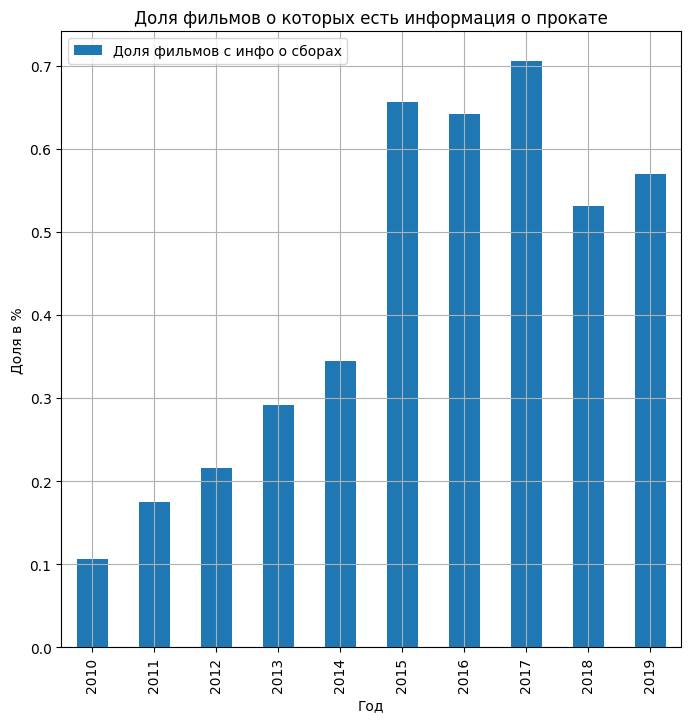

In [99]:
# новые пока пустые списки с годом, кол-во фильмов со сборами и общее кол-во фильмов
god=[]
skolko_box=[]
total_box_v_viborke=[]

# цикл, сохраняющий значения года, кол-во фильмов со сборами, кол-во фильмов общее (все по годам)
for i in data_fin['year'].unique():
    x=data_fin.loc[(data_fin['year']==i)&(~data_fin['box_office'].isna()),'title'].count()
    j=data_fin.loc[(data_fin['year']==i),'title'].count()
    god.append(i)
    skolko_box.append(x)
    total_box_v_viborke.append(j)


# подготовка к созданию dataframe из нескольких списков
zipped=list(zip(god,skolko_box,total_box_v_viborke))
kolvo_box=pd.DataFrame(zipped, columns=['god','total_+', 'total_v_viborke'])

#вычисление доли фильмов со сборами в целом
kolvo_box['%']=kolvo_box['total_+']/kolvo_box['total_v_viborke']
kolvo_box=kolvo_box.sort_values(by='god').reset_index(drop=True)

# вывод нового dataframe
print(kolvo_box)

#вывод графика о долях на основе нового dataframe
kolvo_box.plot(y='%', kind='bar', x='god',
label='Доля фильмов с инфо о сборах',figsize=(8,8),
title='Доля фильмов о которых есть информация о прокате',
xlabel = 'Год', ylabel='Доля в %',
legend=True, grid=True)
plt.show()

**Вывод** Доля фильмов с информацией о сборах умеренно увеличивается на протяжениии заданного временого отрезка (2010-2019гг.). Минимальное значение достигнутое в 2010г. достаточно резко меняется до максимального в 2017г. но немного опять тренд снижается в 2018г., и опять увеличивается (немного) в 2019г. В целом, такая картина свидетельствует о том, что возможно из-за большого объема информации, данные о фильмах старше (условно) 7-10 лет постепенно стирается (для восвобождения свободного пространства для хранения новой "свежей информацией" и вероятно такая теория подтвержиться при рассмотрении кол-ва фильмов в целой выборке по годам и сравнение кол-во фильмов с инфо о сборах в единицах)

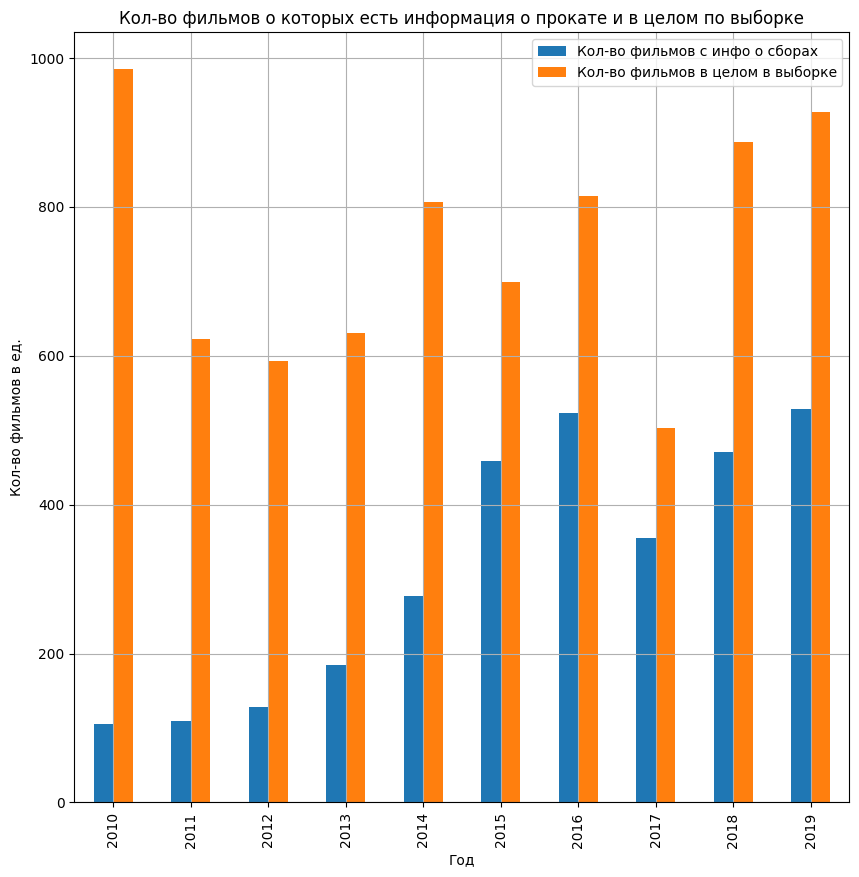

In [100]:
#вывод графиков о кол-ве фильмов на основе нового dataframe
kolvo_box.plot(y=['total_+','total_v_viborke'], kind='bar', x='god',
label=['Кол-во фильмов с инфо о сборах','Кол-во фильмов в целом в выборке'],figsize=(10,10),
title='Кол-во фильмов о которых есть информация о прокате и в целом по выборке',
xlabel = 'Год', ylabel='Кол-во фильмов в ед.',
legend=True, grid=True)
plt.show()

**Вывод** больше всего фильмов выходило в 2010 году. Самое минимальное кол-во фильмов выходило в 2017 г. При этом на всем протяжении (с 2010-2019гг.) в целом небольшой тренд на уменьшение кол-во выхода фильмов. Резкий подьем в 2010 сменился на резкое падение в 2011 г. и с тех пор выравнивался и увеличивался к 2019г., но все еще не достигнут пик 2010г. Для точного подтверждения тренда, нужно больше данных (хотя бы за 2020-2021 гг.возможно там фильмов выходило больше и в целом пик 2010 уже пройден).  
В части выхода в прокат- самым "известным по информации о сборах" в единицах оказался 2019 г.(немного отстал 2016г.), при этом самыми "неинформативными" оказались 2010 и 2011 год (но "пальма первенства" принадлежит 2010г.). И замечен в целом четкий тренд на увеличение информации о сборах (картину немного "омрачает" 2017 год, но общую картину при этом не меняет, тем более что 2017г. в процентном выражении самый "известный".)  
Помимо прочего, теория обозначенная ранее в исследовании (об удалении информации за давностью) в целом подтверждается (особенно заметно на пиках в 2010 г. (много фильмов-мало инфо) и в 2017 г. (мало фильмов-но доля фильмов с инфо больше). Однако, вероятно, что информацию не вносили по иным причинам. "Провал" в информации в 2018г. возможно обусловлен большим кол-во фильмов которые показывались по ТВ и сборов не приносили (или инфо о сборах просто не вносилась)

In [101]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7468 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7468 non-null   object             
 1   puNumber               7468 non-null   int64              
 2   show_start_date        7468 non-null   datetime64[ns, UTC]
 3   type                   7468 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7468 non-null   object             
 6   director               7468 non-null   object             
 7   producer               7468 non-null   object             
 8   age_restriction        7468 non-null   object             
 9   refundable_support     7468 non-null   float64            
 10  nonrefundable_support  7468 non-null   float64            
 11  budget                 315 non-null    float64          

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

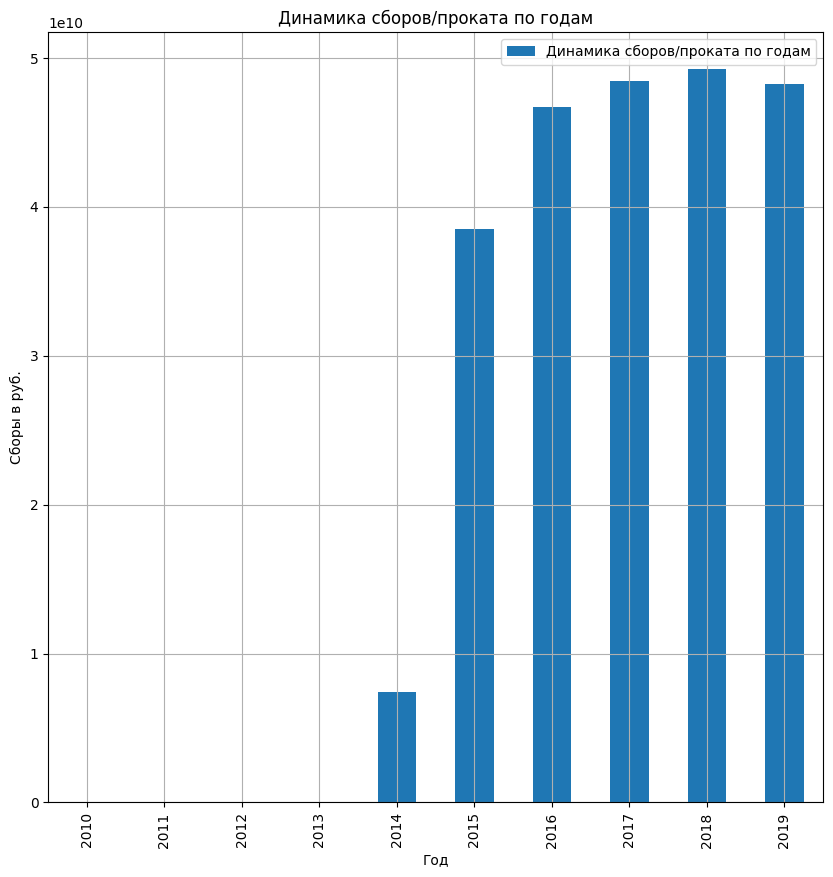

In [102]:
# сводная таблица по исследуемым данным
dynamic_sbor=data_fin.pivot_table(index='year',values='box_office', aggfunc='sum')
pd.options.display.float_format ='{:,.3f}'.format
#display(dynamic_sbor)

# описание данных в сводной таблице
#print(dynamic_sbor.describe())

#вывод графика
dynamic_sbor.plot(y='box_office',
kind='bar', figsize=(10,10), title='Динамика сборов/проката по годам',
label='Динамика сборов/проката по годам',
xlabel = 'Год', ylabel='Cборы в руб.',
legend=True, grid=True)
plt.show()

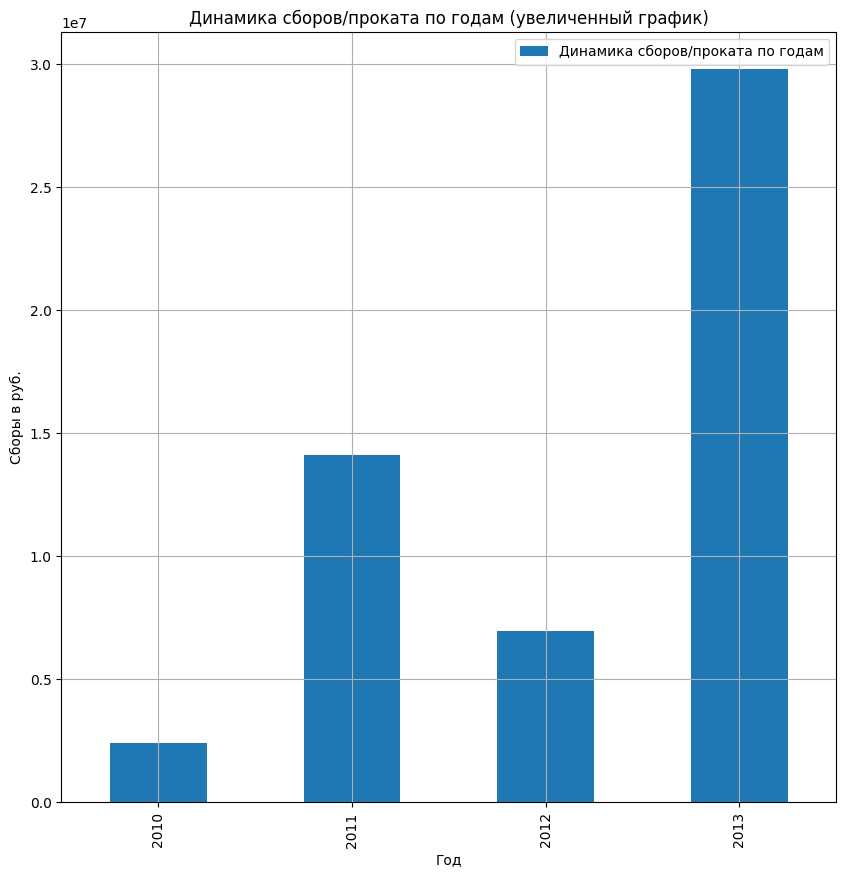

In [103]:
#вывод графика увеличенный
dynamic_sbor.query('box_office<30000000').plot(y='box_office',kind='bar',
figsize=(10,10), title='Динамика сборов/проката по годам (увеличенный график)',
label='Динамика сборов/проката по годам',
xlabel = 'Год', ylabel='Cборы в руб.',
legend=True, grid=True)
plt.show()

**Вывод**Максимальное значение сборов, он же самый прибыльный год - 2018 г., самый "убыточный" - 2010г. (и это на фоне самого высокого показателя наличия фильмов в выборке за этот год). Т.е. таким образом, можно предположить, что в выборке за 2010 г. указаны фильмы либо только те, которые "крутились" не в кинотеатре (по ТВ, поэтому сборов нет), либо информация о фильмах удаляется "за давностью лет", либо и то и другое.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

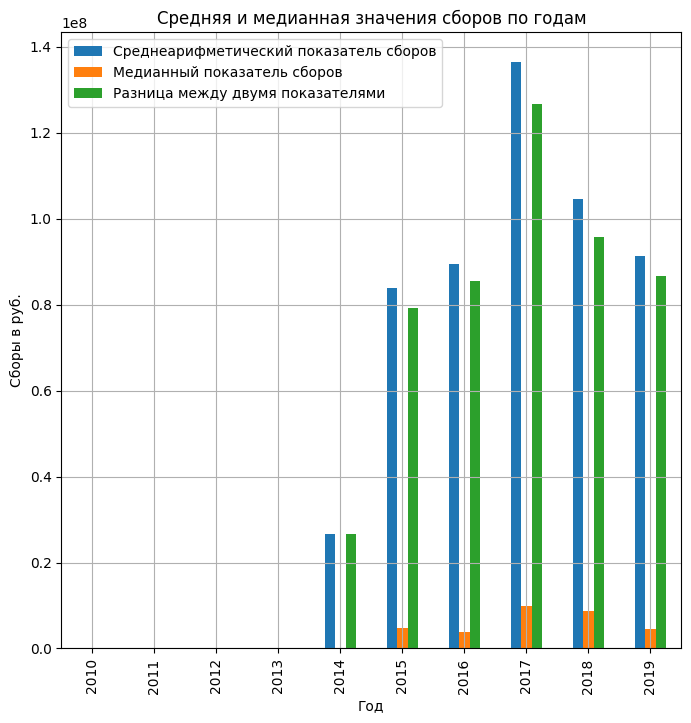

In [104]:
# сравнение сборов по ср. арифметической и медианной
dynamic_sbor=data_fin.pivot_table(index='year',values='box_office', aggfunc=['mean','median'])
dynamic_sbor.columns=['box_office_mean','box_office_median']
dynamic_sbor['difference']=dynamic_sbor['box_office_mean']-dynamic_sbor['box_office_median']
pd.options.display.float_format ='{:,.3f}'.format

# вывод графика
dynamic_sbor.plot(y=['box_office_mean','box_office_median','difference'],
title='Средняя и медианная значения сборов по годам',
label=['Среднеарифметический показатель сборов','Медианный показатель сборов','Разница между двумя показателями'],
xlabel = 'Год', ylabel='Cборы в руб.',legend=True, grid=True, kind='bar',figsize=(8,8))
plt.show()

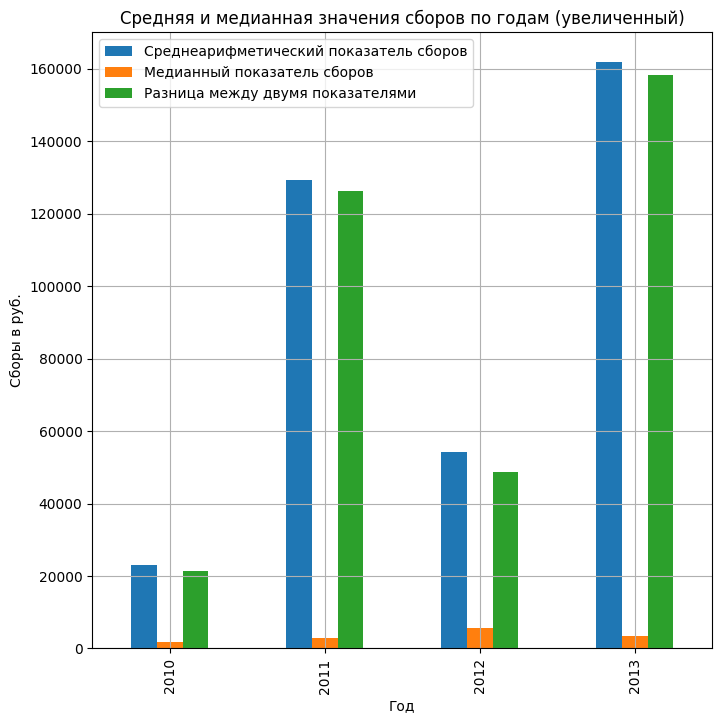

In [105]:
# вывод графика увеличенный
dynamic_sbor.query('difference<26725451').plot(y=['box_office_mean','box_office_median','difference'],
title='Средняя и медианная значения сборов по годам (увеличенный)',
label=['Среднеарифметический показатель сборов','Медианный показатель сборов','Разница между двумя показателями'],
xlabel = 'Год', ylabel='Cборы в руб.',legend=True, grid=True, kind='bar',figsize=(8,8))
plt.show()

**Вывод** исходя из данных сборов по медианной, самый прибыльный оказался 2017 г., и второе место - 2018, и самые минимальные показатели приходятся на период с 2010 по 2014 гг. (на фоне показателей 2014-2019 не отображается из-за низких показателей)  
Исходя из данных по средней. арифметической, самый прибыльный -2017, при этом 2016 и 2018г. хоть и на "втором" месте по прибыльности, однако не могут считаться сапоставимыми с 2017, и находится ближе к уровню с 2015 г и 2019г.
Немногим лучше показался 2014 год.
Можно сделать вывод, что в целом выборка неоднородна, т.к. данные слишком искажаются (слишком много отсутствующей информации)  
Разница между медианными и среднеарифметическими значениями колоссальная. Связано это прежде всего с неоднородностью данных (которые легко принять за выбросы). Разные фильмы по-разному "приносили" сборы, поэтому, с учетом определения медианной - отсекается "поровну" значения - и средней арифметической - учет всех значений и деление на кол-во - средняя арифметическая учитывает "всплески" и "сглаживает" показатели, но учитывает все показатели, при этом медианная - почти как середина - не учитывает возможные всплески. Медианная была бы уместна и информативнее, при условии наличия более 80% информации по всей выборке, равномерно по всем годам. Однако, с учетом того, что фильмы творческая деятельность, в любом случае, "приведение" показателей "под один стандарт" был бы затруднителен. Сборы в таком случае, все же лучше смотреть по средней арифметической ( которая сглаживает, в т.ч. и провальные показы и показы по ТВ, сборов с которых, предполагается, нет).  
суммы сборов не выводятся в одном графике с медианными, средними значениями поскольку последних на фоне сумм просто не видно (они малы по сравнению с суммами)

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

,box_office
age_restriction_new,
0+,"809,077,425.970"
12+,"59,369,189,769.500"
16+,"75,102,265,973.600"
18+,"40,757,657,833.610"
6+,"55,220,193,077.920"


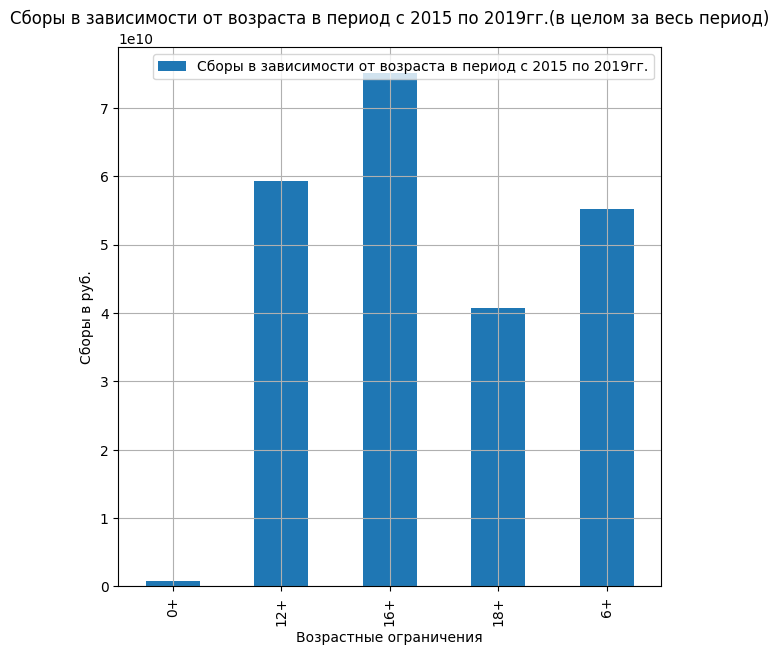

In [106]:
#функция для создания нового столбца с "укороченным названием возрастного ограничения"
def rename_calcul(row):
    age=row['age_restriction']
    if '0+' in age:
        return '0+'
    elif '12+' in age:
        return '12+'
    elif '16+' in age:
        return '16+'
    elif '18+' in age:
        return '18+'
    elif '6+' in age:
        return '6+'


data_fin['age_restriction_new']=data_fin.apply(rename_calcul, axis=1)

#отрезаем исследуемый период
vozrast_film=data_fin.query('year>=2015')

#создание сводной таблицы по возрастным категориям
vozrast_film_new=vozrast_film.pivot_table(index='age_restriction_new', values='box_office', aggfunc='sum')
display(vozrast_film_new)

# вывод графика
vozrast_film_new.plot(y='box_office', kind='bar',figsize=(7,7),
title='Сборы в зависимости от возраста в период с 2015 по 2019гг.(в целом за весь период)',
label='Сборы в зависимости от возраста в период с 2015 по 2019гг.',
xlabel = 'Возрастные ограничения', ylabel='Cборы в руб.',legend=True, grid=True)
plt.show()

**Вывод** в период с 2015 по 2019 гг. меньше всего было сборов в категории "для любой зрительской аудитории". Больше всего сборов было собрано для категорий "для детей старше 16 лет".

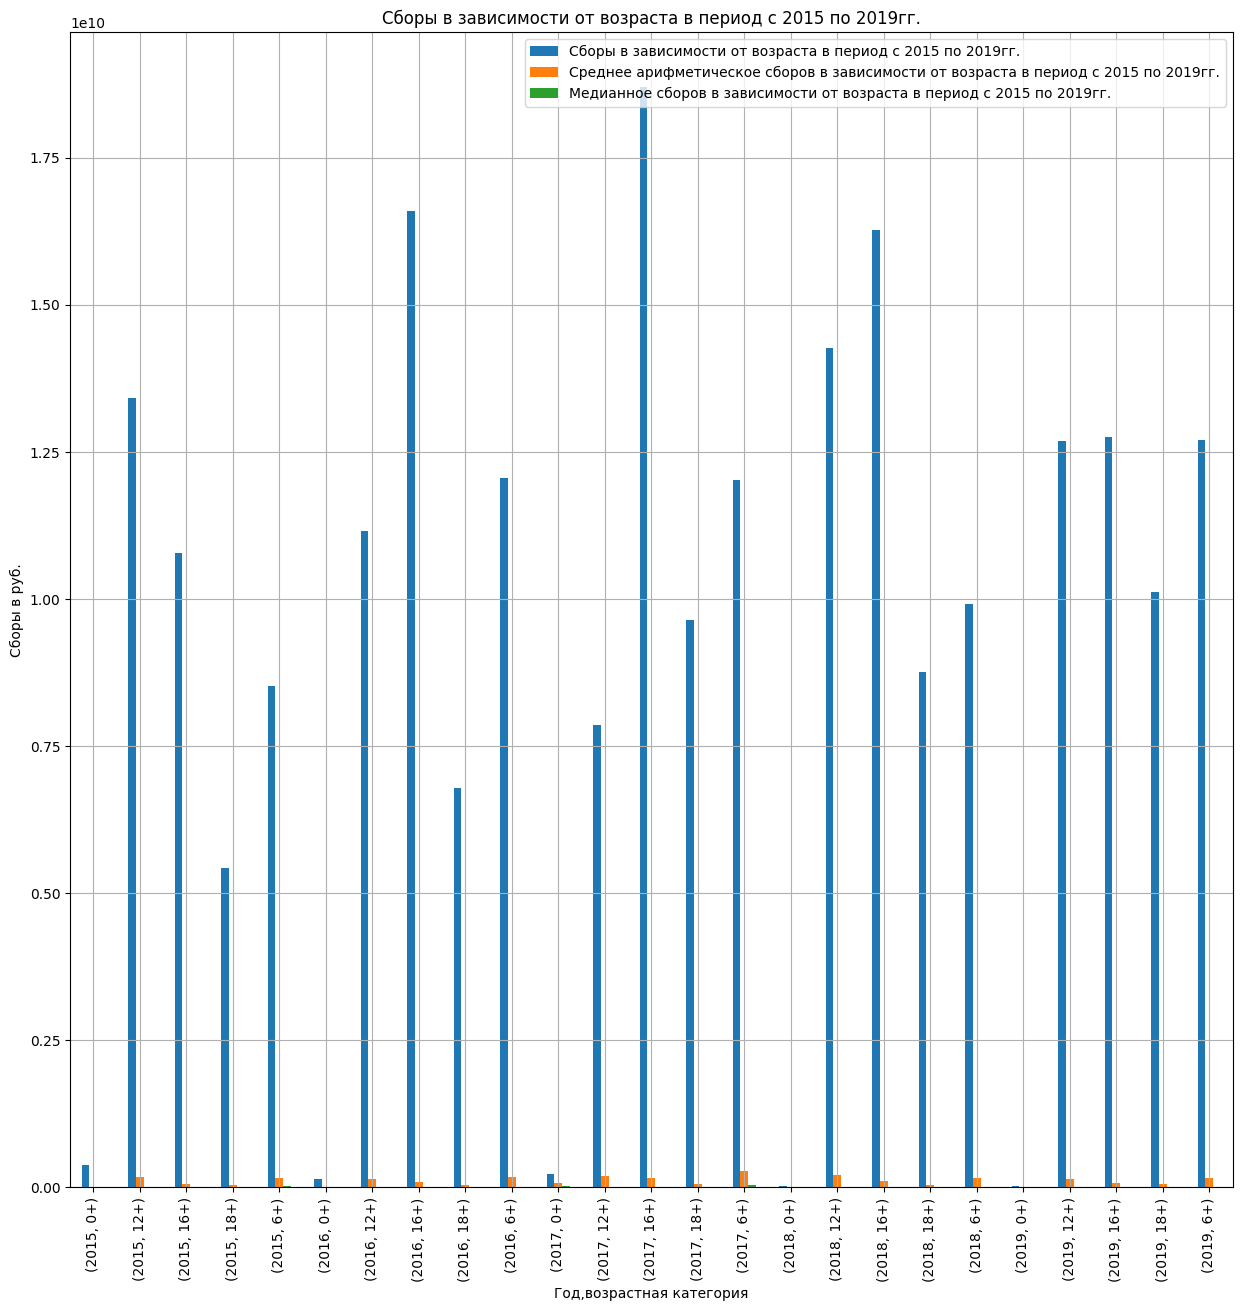

In [107]:
#таблица сборов по возрастным ограничениям по годам
vozrast_films=data_fin.query('year>=2015').pivot_table(index=['year','age_restriction_new',], values='box_office', aggfunc=['sum','mean','median'])
vozrast_films.columns=['summa','srednee','mediannoe']
#display(vozrast_films)
vozrast_films.describe()

#вывод графика
vozrast_films.plot(y=['summa','srednee', 'mediannoe'],kind='bar',xlabel = 'Год,возрастная категория', ylabel='Cборы в руб.',legend=True, grid=True,
label=['Сборы в зависимости от возраста в период с 2015 по 2019гг.','Среднее арифметическое сборов в зависимости от возраста в период с 2015 по 2019гг.','Медианное сборов в зависимости от возраста в период с 2015 по 2019гг.'],
figsize=(15,15),title='Сборы в зависимости от возраста в период с 2015 по 2019гг.')
plt.show()

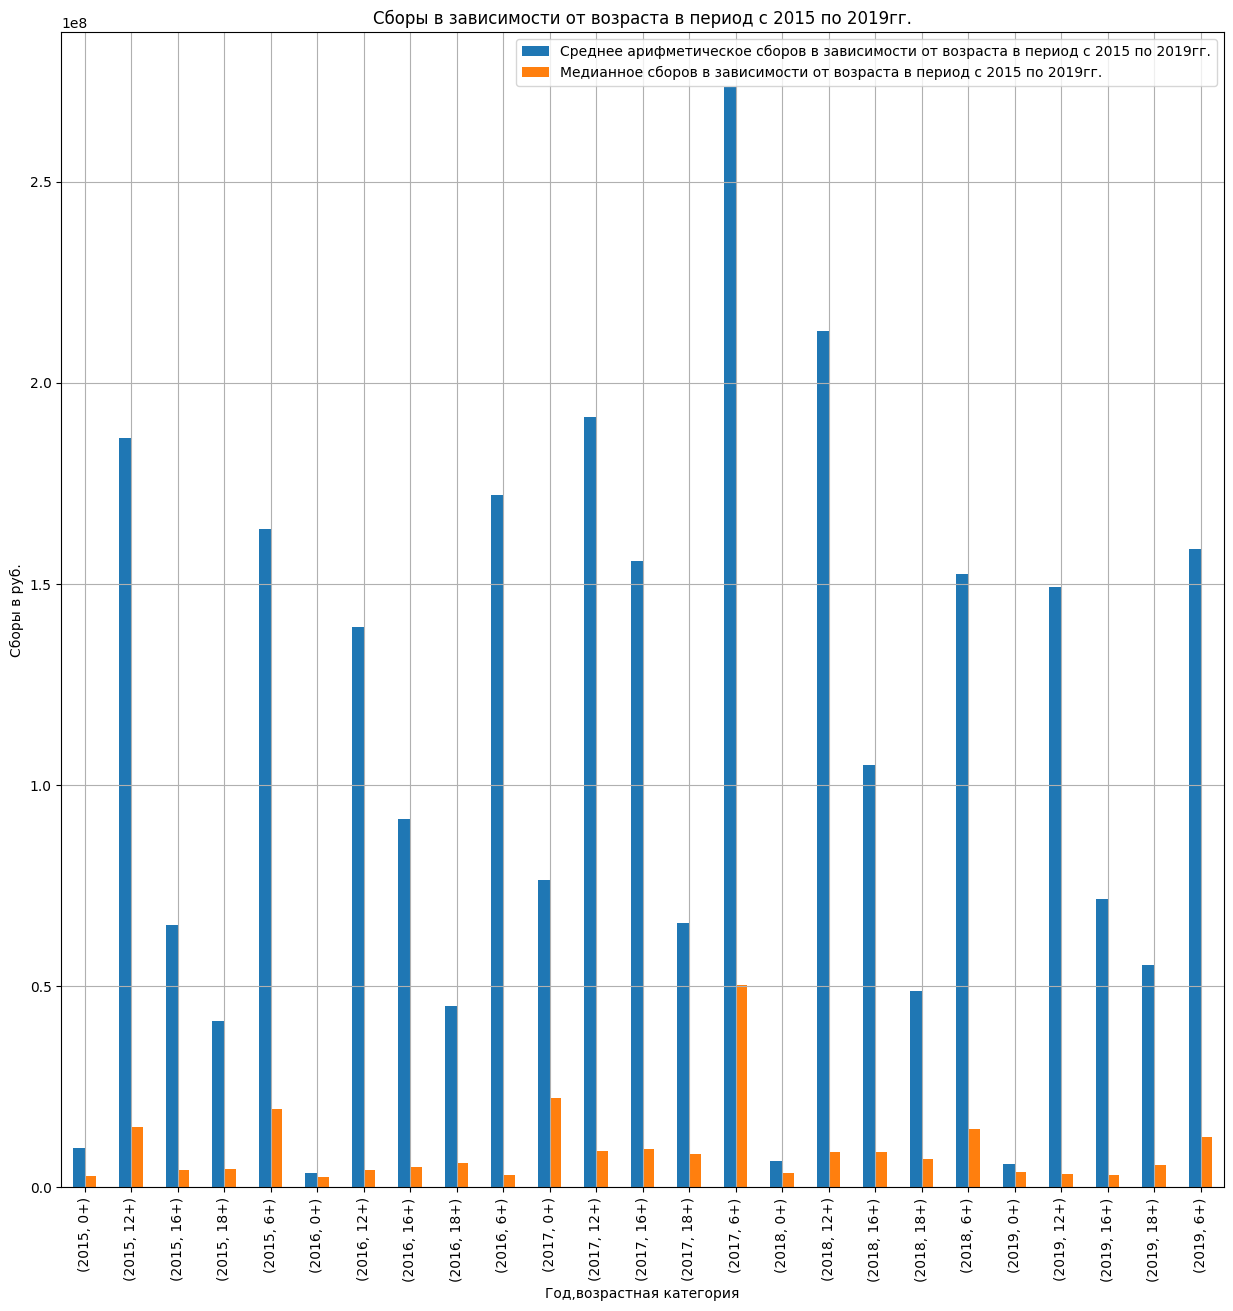

In [108]:
#вывод графика (только для средней и медианной, т.к. на едином графике некоторых значений не видно)
vozrast_films.plot(y=['srednee', 'mediannoe'],kind='bar',xlabel = 'Год,возрастная категория', ylabel='Cборы в руб.',legend=True, grid=True,
label=['Среднее арифметическое сборов в зависимости от возраста в период с 2015 по 2019гг.','Медианное сборов в зависимости от возраста в период с 2015 по 2019гг.'],
figsize=(15,15),title='Сборы в зависимости от возраста в период с 2015 по 2019гг.')
plt.show()

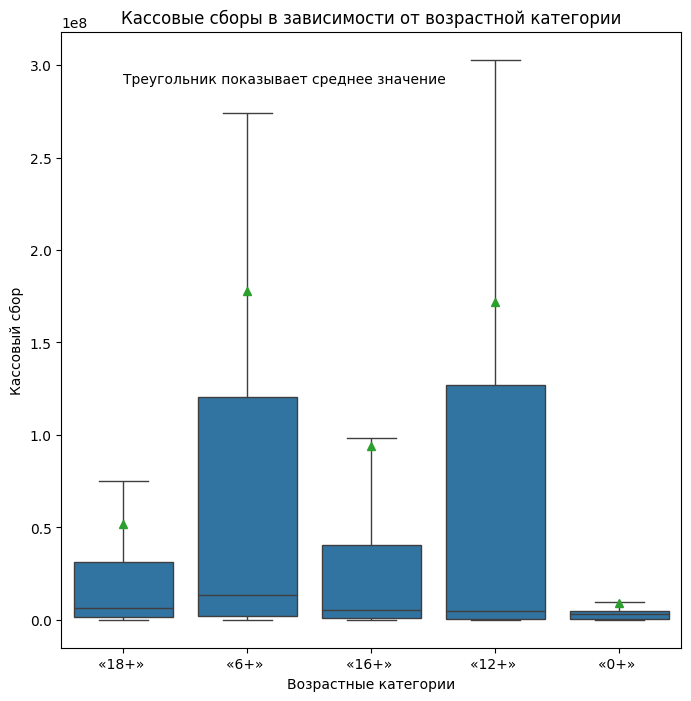

In [109]:
# Комментарий ревьюера 2
import seaborn as sns
temp = data_fin.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = (temp['year'] >= 2015) & (temp['year'] <= 2019)

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории',
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 2.9e8,'Треугольник показывает среднее значение')
plt.show()

**Вывод** В 2015 году больше всего сборов в категории старше 12 лет, и минимальное - для любой возрастной категории. При этом в 2016 больше сборов было собрано в категории старше 16 лет, по прежнему минимально в категории "для любой возрастной категории", при этом в категории "запрещено для детей" - немногим больше объем в сравнении с 2015 г. Тренд на снижение сборов в категории 12+ продолжается в 2017г.(небольшой пик достигнут в 2018г. и потом снова снижение в 2019г.) Для категории старше 16 - также максимальное значение (и в целом максимальное значение сборов по всему периоду по всем ограничениям), и ничего не меняется для категории 0+. В 2018 г. в категории 0+ опять минимум сборов, при этом в категории 12+ сборов стало больше относительно предыдущего года (немногим больше в сравнении с 2016г.) В 2019г. по категориям 6+, 12+,16+ - сапоставимо, небольшой "провал" в категории 18+ (максимальное в категории 16+), и минимальное 0+.  
Предполагается, что на такие колебания влияет в первую очередь выборка (почти половина инфо о сборах отсуствует, и самый минимально известный 2017г. в выборке "имеет" пик по сборам в категории 16+(которая в целом является самой "прибыльной"). При этом подтверждается вывод о том, что в отличии, например, цен на недвижимость, где возможно отличить "выбросы" и/или некорреткные значения, сборы являются непредсказуемыми величинами, и как любая творческая деятельность может "выстрелить" а может и нет, отличить реальные ошибки и неточности в данных от "грандиозных успехов" - невозмозможно с помощью анализа числовых данных. В частности, этим и объясняется колоссальная разница между ср.арифметическими значениями и медианными.  
При этом в графике отчетливо видно как "взрослеет" аудитория (планомерное увеличение сборов в возрастных категориях "старше" и уменьшение сборов в категориях "младше")

**Вывод** Доля фильмов с информацией о сборах умеренно увеличивается на протяжениии заданного временого отрезка (2010-2019гг.). Минимальное значение достигнутое в 2010г. достаточно резко меняется до максимального в 2017г. но немного опять тренд снижается в 2018г., и опять увеличивается (немного) в 2019г. В целом, такая картина свидетельствует о том, что возможно из-за большого объема информации, данные о фильмах старше (условно) 7-10 лет постепенно стирается (для восвобождения свободного пространства для хранения новой "свежей информацией" и вероятно такая теория подтвержиться при рассмотрении кол-ва фильмов в целой выборке по годам и сравнение кол-во фильмов с инфо о сборах в единицах)  
Больше всего фильмов выходило в 2010 году. Самое минимальное кол-во фильмов выходило в 2017 г. При этом на всем протяжении (с 2010-2019гг.) в целом небольшой тренд на уменьшение кол-во выхода фильмов. Резкий подьем в 2010 сменился на резкое падение в 2011 г. и с тех пор выравнивался и увеличивался к 2019г., но все еще не достигнут пик 2010г. Для точного подтверждения тренда, нужно больше данных (хотя бы за 2020-2021 гг.возможно там фильмов выходило больше и в целом пик 2010 уже пройден).  
В части выхода в прокат- самым "известным по информации о сборах" оказался 2019 г.(немного отстал 2016г.), при этом самыми "неинформативными" оказались 2010 и 2011 год (но "пальма первенства" принадлежит 2010г.). И замечен в целом четкий тренд на увеличение информации о сборах (картину немного "омрачает" 2017 год, но общую картину при этом не меняет, тем более что 2017г. в процентном выражении самый "известный".)  
Помимо прочего, теория обозначенная ранее в исследовании (об удалении информации за давностью) в целом подтверждается (особенно заметно на пиках в 2010 г. (много фильмов-мало инфо) и в 2017 г. (мало фильмов-но доля фильмов с инфо больше). Однако, вероятно, что информацию не вносили по иным причинам.  
Максимальное значение сборов, он же самый прибыльный год - 2018 г., самый "убыточный" - 2010г. (и это на фоне самого высокого показателя наличия фильмов в выборке за этот год). Т.е. таким образом, можно предположить, что в выборке за 2010 г. указаны фильмы либо только те, которые "крутились" не в кинотеатре (по ТВ, поэтому сборов нет), либо информация о фильмах удаляется "за давностью лет", либо и то и другое.  
Исходя из данных сборов по медианной, самый прибыльный оказался 2017 г., и второе место - 2018, и самые минимальные показатели приходятся на период с 2010 по 2014 гг. (на фоне показателей 2014-2019 не отображается из-за низких показателей)  
Исходя из данных по средней. арифметической, самый прибыльный -2017, при этом 2016 и 2018г. хоть и на "втором" месте по прибыльности, однако не могут считаться сапоставимыми с 2017, и находится ближе к уровню с 2015 г и 2019г.
Немногим лучше показался 2014 год.
Можно сделать вывод, что в целом выборка неоднородна, т.к. данные слишком искажаются (слишком много отсутствующей информации)  
Разница между медианными и среднеарифметическими значениями колоссальная. Связано это прежде всего с неоднородностью данных (которые легко принять за выбросы). Разные фильмы по-разному "приносили" сборы, поэтому, с учетом определения медианной - отсекается "поровну" значения - и средней арифметической - учет всех значений и деление на кол-во - средняя арифметическая учитывает "всплески" и "сглаживает" показатели, но учитывает все показатели, при этом медианная - почти как середина - не учитывает возможные всплески. Медианная была бы уместна и информативнее, при условии наличия более 80% информации по всей выборке, равномерно по всем годам. Однако, с учетом того, что фильмы творческая деятельность, в любом случае, "приведение" показателей "под один стандарт" был бы затруднителен. Сборы в таком случае, все же лучше смотреть по средней арифметической ( которая сглаживает, в т.ч. и провальные показы и показы по ТВ, сборов с которых, предполагается, нет).  
В 2015 году больше всего сборов в категории старше 12 лет, и минимальное - для любой возрастной категории. При этом в 2016 больше сборов было собрано в категории старше 16 лет, по прежнему минимально в категории "для любой возрастной категории", при этом в категории "запрещено для детей" - немногим больше объем в сравнении с 2015 г. Тренд на снижение сборов в категории 12+ продолжается в 2017г.(небольшой пик достигнут в 2018г. и потом снова снижение в 2019г.) Для категории старше 16 - также максимальное значение (и в целом максимальное значение сборов по всему периоду по всем ограничениям), и ничего не меняется для категории 0+. В 2018 г. в категории 0+ опять минимум сборов, при этом в категории 12+ сборов стало больше относительно предыдущего года (немногим больше в сравнении с 2016г.) В 2019г. по категориям 6+, 12+,16+ - сапоставимо, небольшой "провал" в категории 18+ (максимальное в категории 16+), и минимальное 0+.  
Предполагается, что на такие колебания влияет в первую очередь выборка (почти половина инфо о сборах отсуствует, и самый минимально известный 2017г. в выборке "имеет" пик по сборам в категории 16+(которая в целом является самой "прибыльной"). При этом подтверждается вывод о том, что в отличии, например, цен на недвижимость, где возможно отличить "выбросы" и/или некорреткные значения, сборы являются непредсказуемыми величинами, и как любая творческая деятельность может "выстрелить" а может и нет, отличить реальные ошибки и неточности в данных от "грандиозных успехов" - невозмозможно с помощью анализа числовых данных. В частности, этим и объясняется колоссальная разница между ср.арифметическими значениями и медианными.  
При этом в графике отчетливо видно как "взрослеет" аудитория (планомерное увеличение сборов в возрастных категориях "старше" и уменьшение сборов в категориях "младше").

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [110]:
display(data_fin.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7468 entries, 0 to 7485
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7468 non-null   object             
 1   puNumber               7468 non-null   int64              
 2   show_start_date        7468 non-null   datetime64[ns, UTC]
 3   type                   7468 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7468 non-null   object             
 6   director               7468 non-null   object             
 7   producer               7468 non-null   object             
 8   age_restriction        7468 non-null   object             
 9   refundable_support     7468 non-null   float64            
 10  nonrefundable_support  7468 non-null   float64            
 11  budget                 315 non-null    float64          

None

In [111]:
#фильтр фрейма с фильмами о которых указана инфо о госюподдержке (новый столбец)
inform_gos_pod=data_fin.loc[data_fin['financing_source']!='Отсутствует']
display(inform_gos_pod)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,%_gospod,age_restriction_new
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,...,"79,411,900.000",Министерство культуры,8.100,"драма,мелодрама","365,353.600",2013,А.Атанесян,драма,33.370,16+
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,...,"37,142,857.000",Министерство культуры,NaN,Отсутствует,"28,140.000",2014,А.Якимчук,Отсутствует,70.000,12+
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,...,"176,023,490.000",Фонд кино,5.300,"комедия,фантастика","19,957,031.500",2013,Р.Давлетьяров,комедия,61.269,12+
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,...,"40,574,140.000",Министерство культуры,4.200,драма,"55,917.500",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.009,16+
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,...,"40,015,122.000",Министерство культуры,6.400,драма,"232,100.000",2014,М.Угаров,драма,62.476,16+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.000",...,"980,000,000.000",Фонд кино,6.000,"история,биография,драма","717,703,185.530",2019,А.Кравчук,история,51.020,12+
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.000",...,"190,000,000.000",Фонд кино,6.700,"мультфильм,приключения,семейный","501,069,235.000",2019,Д.Шмидт,мультфильм,52.632,6+
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.000",...,"944,000,000.000",Фонд кино,5.700,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,52.966,12+
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.000,...,"46,154,000.000",Министерство культуры,5.900,драма,NaN,2019,И.Северов,драма,65.000,12+


In [112]:
inform_gos_pod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1281 to 7478
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  315 non-null    object             
 1   puNumber               315 non-null    int64              
 2   show_start_date        315 non-null    datetime64[ns, UTC]
 3   type                   315 non-null    object             
 4   film_studio            315 non-null    object             
 5   production_country     315 non-null    object             
 6   director               315 non-null    object             
 7   producer               315 non-null    object             
 8   age_restriction        315 non-null    object             
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 315 non-null    float64        

In [113]:
#сколько выделяют средств на поддержку кино
total_gos_pod=inform_gos_pod['nonrefundable_support'].sum()+inform_gos_pod['refundable_support'].sum()
print(f'Всего выделено денег-поддержка кино: {total_gos_pod}')

#столбец с общей гос поддержкой для каждого фильма
inform_gos_pod['total_gos_pod']=inform_gos_pod['nonrefundable_support']+inform_gos_pod['refundable_support']
display(inform_gos_pod.head())

Всего выделено денег-поддержка кино: 18808718847.0


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,main_director,main_genre,%_gospod,age_restriction_new,total_gos_pod
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,...,Министерство культуры,8.100,"драма,мелодрама","365,353.600",2013,А.Атанесян,драма,33.370,16+,"26,500,000.000"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,...,Министерство культуры,NaN,Отсутствует,"28,140.000",2014,А.Якимчук,Отсутствует,70.000,12+,"26,000,000.000"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,...,Фонд кино,5.300,"комедия,фантастика","19,957,031.500",2013,Р.Давлетьяров,комедия,61.269,12+,"107,847,945.000"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,...,Министерство культуры,4.200,драма,"55,917.500",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.009,16+,"28,000,000.000"
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,...,Министерство культуры,6.400,драма,"232,100.000",2014,М.Угаров,драма,62.476,16+,"25,000,000.000"


In [114]:
#расчет рентабельности кино (в целом)
rentabelnost_film=total_gos_pod/inform_gos_pod['box_office'].sum()
print(f'Рентабельность поддержки кино в целом по выборке: {rentabelnost_film:.2%}')

#расчет рентабльности по фильмам/строкам
inform_gos_pod['rent_film']=(inform_gos_pod['nonrefundable_support']+inform_gos_pod['refundable_support'])/inform_gos_pod['box_office']
display(inform_gos_pod.tail(14)
.style
.format({'rent_film': '%{:.2f}'}))

Рентабельность поддержки кино в целом по выборке: 47.81%


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,%_gospod,age_restriction_new,total_gos_pod,rent_film
7268,РОБО,111017319,2019-10-30 12:00:00+00:00,Художественный,"ООО ""Лаборатория Кино""",Россия,С.Андреасян,"А.Ананикян, Г.Андреасян, С.Андреасян",«6+» - для детей старше 6 лет,0.000000,30000000.000000,140025000.000000,Министерство культуры,7.600000,"фантастика,боевик,триллер",66504721.610000,2019,С.Андреасян,фантастика,21.424746,6+,30000000.000000,%0.45
7290,Урфин Джюс возвращается,114004019,2019-10-14 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,Ф.Дмитриев,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,0.000000,200000000.000000,300000000.000000,Фонд кино,6.200000,"мультфильм,детский",68549523.470000,2019,Ф.Дмитриев,мультфильм,66.666667,6+,200000000.000000,%2.92
7320,Новогодний ремонт,111018219,2019-11-07 12:00:00+00:00,Художественный,"ООО ""ВитЭл""",Россия,А.Пинхасов,"Е.Михайлова, В.Галыгин, В.Колесник, А.Седых, Г.Атаев, А.Камынин",«12+» - для детей старше 12 лет,0.000000,20000000.000000,30448911.000000,Министерство культуры,5.600000,"комедия,мелодрама",3591456.360000,2019,А.Пинхасов,комедия,65.683794,12+,20000000.000000,%5.57
7322,Успех,111018519,2019-11-04 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000.000000,20000000.000000,75000000.000000,Фонд кино,7.800000,драма,3181218.000000,2019,П.Руминов,драма,33.333333,12+,25000000.000000,%7.86
7330,Лев Яшин. Вратарь моей мечты,111018719,2019-11-21 12:00:00+00:00,Художественный,"ООО ""Кремлин Филмз""",Россия,В.Чигинский,О.Капанец,«6+» - для детей старше 6 лет,0.000000,60000000.000000,360054850.000000,Министерство культуры,6.900000,"биография,спорт,драма",114090162.740000,2019,В.Чигинский,биография,16.664128,6+,60000000.000000,%0.53
7344,Кроличья лапа,111018919,2019-11-20 12:00:00+00:00,Художественный,"ООО ""Зебра"", ""Артемис"", ""Гринлит""","Россия, Бельгия, Финляндия",Н.Джорджадзе,Ю.Соболевская,«16+» - для детей старше 16 лет,0.000000,30000000.000000,47734050.000000,Министерство культуры,nan,Отсутствует,nan,2019,Н.Джорджадзе,Отсутствует,62.848218,16+,30000000.000000,%nan
7375,Тварь,111019419,2019-11-26 12:00:00+00:00,Художественный,"ООО ""СОК""",Россия,О.Городецкая,"П.Зарукин, О.Филипук, Ф.Ламшин, М.Абрамов, Н.Трынкин, В.Ряшин, И.Бурец",«16+» - для детей старше 16 лет,5000000.000000,35000000.000000,78422212.000000,Фонд кино,5.000000,"триллер,драма",18617156.960000,2019,О.Городецкая,триллер,51.005957,16+,40000000.000000,%2.15
7453,Фиксики против кработов,114004819,2019-12-21 12:00:00+00:00,Анимационный,"АО ""Аэроплан""",Россия,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","Г.Васильев, С.Саркисов, И.Попов",«6+» - для детей старше 6 лет,80000000.000000,40000000.000000,270000000.000000,Фонд кино,7.500000,"мультфильм,детский,приключения",387590521.720000,2019,В.Бедошвили,мультфильм,44.444444,6+,120000000.000000,%0.31
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзиев, В.Шляппо, А.Троцюк, Р.Минасбекян, В.Верещагин, А.Кушаев",«12+» - для детей старше 12 лет,25000000.000000,35000000.000000,160000000.000000,Фонд кино,6.800000,комедия,3073568690.790000,2019,К.Шипенко,комедия,37.500000,12+,60000000.000000,%0.02
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.000000,400000000.000000,980000000.000000,Фонд кино,6.000000,"история,биография,драма",717703185.530000,2019,А.Кравчук,история,51.020408,12+,500000000.000000,%0.70


#### Графики рентабельности, объемов поддержки по годам и долей таковой в бюджете, сборов и рейтингов

,mean_%_gospod,mean_rent_film,mean_total_gos_pod,median_%_gospod,median_rent_film,median_total_gos_pod
year,,,,,,
2013,47.320,38.968,"67,173,972.500",47.320,38.968,"67,173,972.500"
2014,52.141,111.356,"36,600,153.267",53.941,9.829,"28,000,000.000"
2015,52.912,511.308,"40,340,518.237",61.140,6.566,"30,000,000.000"
2016,55.267,199.760,"68,571,646.241",63.701,3.414,"35,000,000.000"
2017,48.090,18.552,"79,460,811.846",47.699,0.763,"40,000,000.000"
2018,50.987,24.476,"59,576,923.077",55.555,1.455,"37,500,000.000"
2019,50.081,14.302,"68,463,768.116",58.323,2.149,"40,000,000.000"


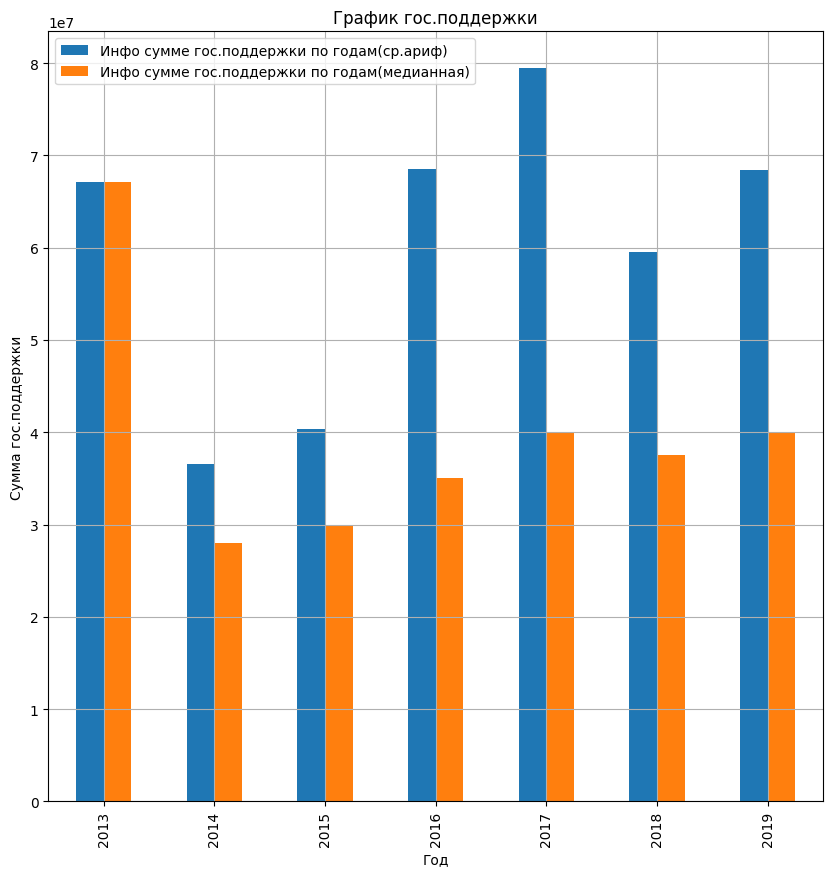

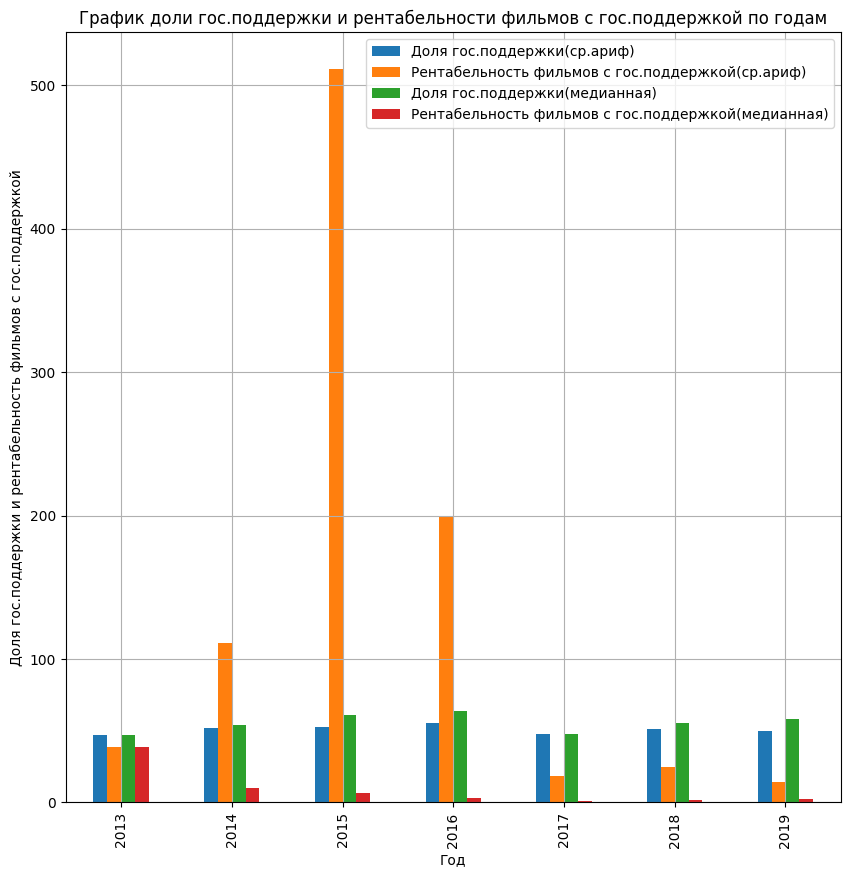

In [115]:
#вывод графиков поддержки и ее доли по годам
data_gos_pivot=inform_gos_pod.pivot_table(index='year', values=['total_gos_pod','%_gospod','rent_film'], aggfunc=['mean','median'])
data_gos_pivot.columns=['mean_%_gospod','mean_rent_film','mean_total_gos_pod','median_%_gospod','median_rent_film','median_total_gos_pod']
display(data_gos_pivot)

#график суммы гос.поддержки
data_gos_pivot.plot(y=['mean_total_gos_pod','median_total_gos_pod'], kind='bar',figsize=(10,10),
label=['Инфо сумме гос.поддержки по годам(ср.ариф)','Инфо сумме гос.поддержки по годам(медианная)'],title='График гос.поддержки',ylabel='Сумма гос.поддержки',xlabel = 'Год',
legend=True, grid=True)
plt.show()

#график доли и рентабельности гос.поддержки
data_gos_pivot.plot(y=['mean_%_gospod','mean_rent_film','median_%_gospod','median_rent_film'], kind='bar',figsize=(10,10),
title='График доли гос.поддержки и рентабельности фильмов с гос.поддержкой по годам',
ylabel='Доля гос.поддержки и рентабельность фильмов с гос.поддержкой',xlabel = 'Год',
label=['Доля гос.поддержки(ср.ариф)', 'Рентабельность фильмов с гос.поддержкой(ср.ариф)','Доля гос.поддержки(медианная)', 'Рентабельность фильмов с гос.поддержкой(медианная)'],
legend=True, grid=True)

plt.show()


In [116]:
inform_gos_pod.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,year,%_gospod,total_gos_pod,rent_film
count,315.000,315.000,315.000,315.000,300.000,301.000,315.000,315.000,315.000,301.000
mean,"111,568,271.314","11,603,174.603","48,107,043.959","134,096,082.346",6.037,"130,698,257.706","2,016.743",51.739,"59,710,218.562",187.146
std,"5,844,829.210","25,151,438.816","59,886,140.864","191,226,039.634",1.159,"339,190,287.299",1.647,17.004,"73,085,213.485","1,407.182"
min,"111,000,115.000",0.000,0.000,"14,462,464.000",1.000,"1,550.000","2,013.000",4.404,"3,000,000.000",0.020
25%,"111,004,815.500",0.000,"25,000,000.000","46,153,866.500",5.400,"1,067,649.000","2,015.000",37.346,"25,250,000.000",0.602
50%,"111,010,219.000",0.000,"30,000,000.000","73,379,554.000",6.200,"12,748,398.300","2,017.000",59.226,"35,000,000.000",2.805
75%,"111,017,167.500","10,000,000.000","40,000,000.000","150,004,286.500",6.700,"103,134,751.120","2,018.000",65.693,"60,000,000.000",25.576
max,"214,010,116.000","180,000,000.000","400,000,000.000","2,305,074,303.000",9.400,"3,073,568,690.790","2,019.000",78.475,"500,000,000.000","22,580.645"


**Вывод** В части касающейся средней арифметической:  
Больше всего был "профинансирован" государством 2017г. На втором месте 2016г. и почти на одном уровне - 2019г. При этом данные полностью совпадают с выводами о "известности" информации о гос.поддержке (аналогично, самым информативным является 2017г.)  
При этом доля гос.поддержки фильмов по годам находится примерно на одном уровне.  
Однако, рентабельность таких фильмов сильно различается: в 2015 пришелся пик рентабельности фильмов (2015г. занимает 2ое место по "известности" информации о сборах).  
В части касающейся медианных значений:  
По данным графика об объемах гос.поддержки: только в 2013 году данные по медианным и средней арифметической совпадают (наиболее вероятно это влияние малочисленностью выборки). При этом пик приходится на 2017 год, и на втором месте 2019 год (при этом тренд с 2014 по 2019 -планомерное увеличение объемов гос поддержки).
Рентабельность фильмов с гос.поддержкой достигнув пика в 2013г. Уверенно снижается на протяжении с 2014-2019 гг. При этом доля гос.поддерджки за весь период находится примерно на одном уровне.


,mean_box_office,median_box_office
year,,
2013,"10,161,192.550","10,161,192.550"
2014,"67,145,876.700","4,731,239.500"
2015,"60,958,828.112","4,568,857.300"
2016,"86,977,620.468","16,814,329.460"
2017,"290,797,711.816","48,557,861.000"
2018,"183,031,870.791","23,225,573.175"
2019,"140,034,247.934","24,101,208.370"


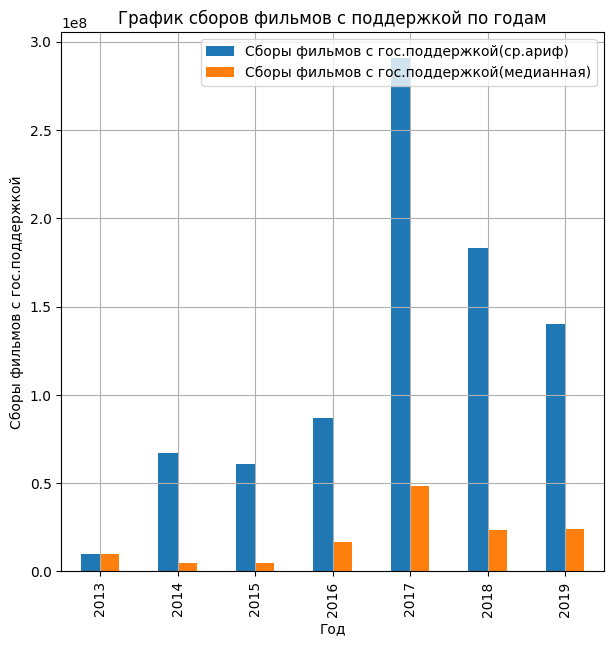

,mean_ratings,median_ratings
year,,
2013,6.700,6.700
2014,5.964,6.350
2015,6.143,6.200
2016,5.693,5.900
2017,6.054,6.200
2018,6.042,6.300
2019,6.176,6.150


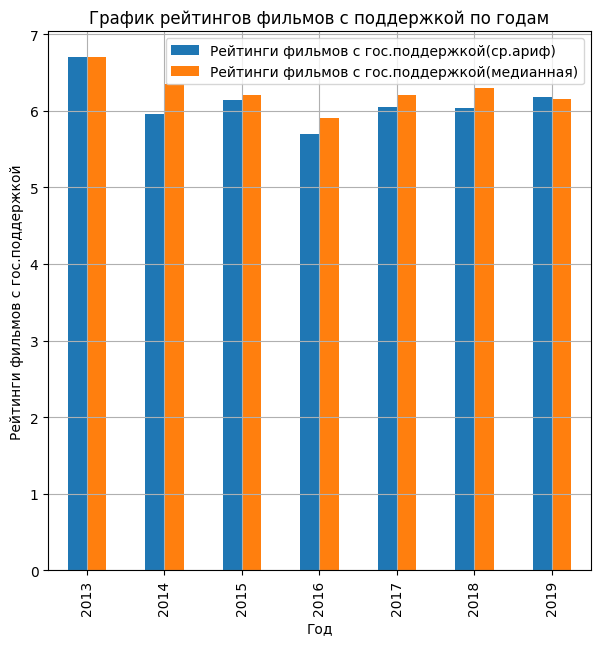

In [117]:
#вывод графика сборов фильмов с гос.поддержкой по годам
data_box_pivot=inform_gos_pod.pivot_table(index='year', values='box_office', aggfunc=['mean','median'])
data_box_pivot.columns=['mean_box_office','median_box_office']
display(data_box_pivot)
data_box_pivot.plot(y=['mean_box_office','median_box_office'], kind='bar',figsize=(7,7), title='График cборов фильмов с поддержкой по годам',
ylabel='Сборы фильмов с гос.поддержкой',xlabel = 'Год',legend=True, grid=True,
label=['Сборы фильмов с гос.поддержкой(ср.ариф)','Сборы фильмов с гос.поддержкой(медианная)'])
plt.show()

#вывод графика рейтингов фильмов с гос.поддержкой
data_rei_pivot=inform_gos_pod.pivot_table(index='year', values='ratings', aggfunc=['mean','median'])
data_rei_pivot.columns=['mean_ratings','median_ratings']
display(data_rei_pivot)
data_rei_pivot.plot(y=['mean_ratings','median_ratings'], kind='bar',figsize=(7,7), title='График рейтингов фильмов с поддержкой по годам',
ylabel='Рейтинги фильмов с гос.поддержкой',xlabel = 'Год',legend=True, grid=True,
label=['Рейтинги фильмов с гос.поддержкой(ср.ариф)','Рейтинги фильмов с гос.поддержкой(медианная)'])
plt.show()


**Вывод**  В части средней арифметической:  
Больше всего сборов пришлось на 2017 г. (самый информативный о сборах год.) и минимум приходится на 2013г. (он же самый ранний год, о котором есть информация о гос.поддержке в целом по выборке.  
В части рейтинга фильмов с гос поддержкой: самый высокий средний рейтинг приходится на 2013 г. (6,7), далее рейтинги находились примерно на одном уровне (от 5.6 (самый миниум, достигнутый в 2016г.) до 6.1)  
В части медианной:  
Пик сборов приходится на 2017г. (самый «известный» год в части касающейся сборов), при этом самым минимальным является 2015г. В целом наблюдается волнообразный график с почти минимальных значений 2014-2015гг до2017г. тренд был положительным, при этом с 2017-2019гг. тренд меняется в сторону отрицательных значений и график идёт на убывание.
В части касающейся рейтингов, график почти аналогичен средней арифметическим значениям.


#### Графики доли гос. поддержки и её объемов, рейтингов, рентабельности и суммы сборов по жанрам

,mean_ratings,median_ratings
main_genre,,
криминал,7.500,7.800
детский,7.125,7.250
спорт,6.933,7.000
биография,6.900,6.900
детектив,6.760,6.800
мюзикл,6.550,6.600
военный,6.467,6.400
драма,6.417,6.400
боевик,6.340,6.300


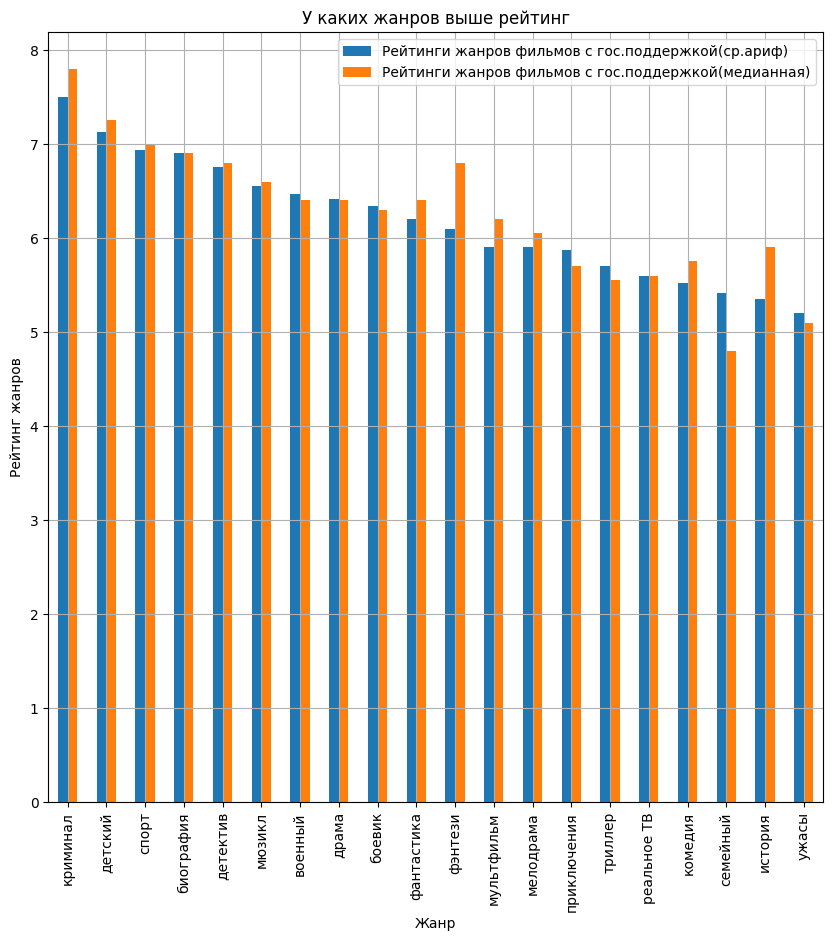

,mean_box_office,median_box_office
main_genre,,
спорт,"989,256,129.147","168,688,859.100"
история,"363,867,058.642","364,283,970.765"
мультфильм,"201,797,244.492","72,749,216.500"
приключения,"200,932,829.437","115,738,715.075"
комедия,"182,112,672.021","24,007,803.980"
биография,"172,294,345.880","114,090,162.740"
военный,"113,074,496.867","22,723,575.000"
Отсутствует,"105,743,858.946","863,259.500"
драма,"105,170,704.535","2,753,544.550"


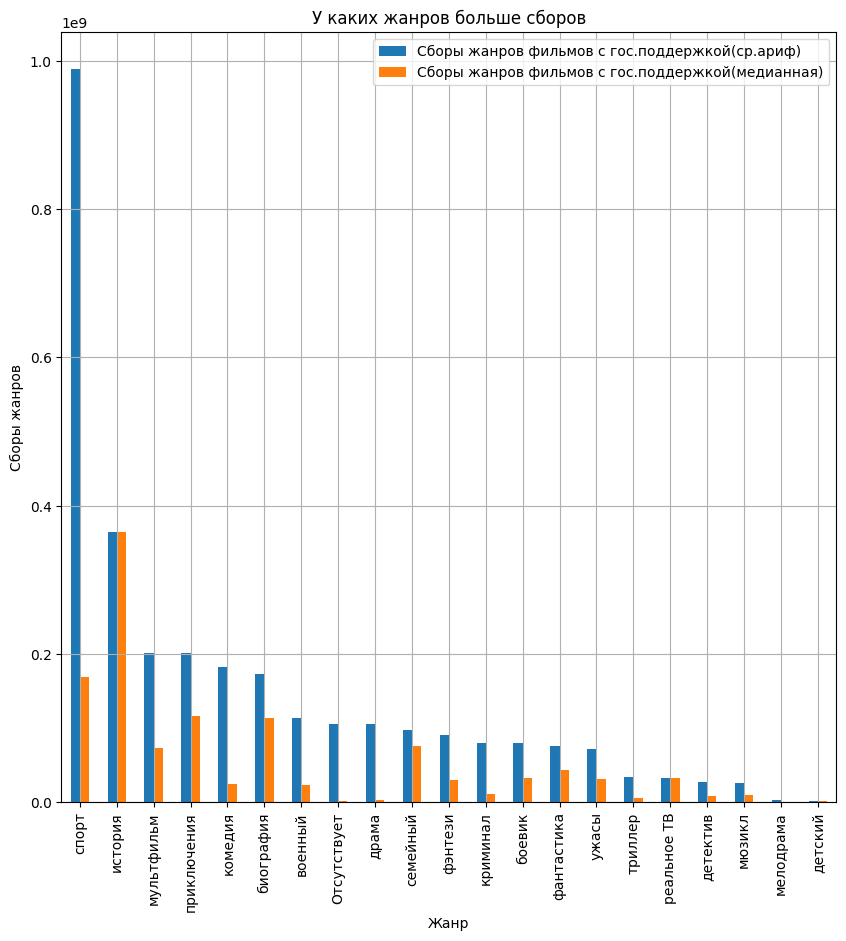

,mean_total_gos_pod,median_total_gos_pod
main_genre,,
история,"255,000,000.000","240,000,000.000"
спорт,"151,666,666.667","40,000,000.000"
фантастика,"115,600,000.000","27,500,000.000"
приключения,"99,428,571.429","40,000,000.000"
детектив,"97,000,000.000","55,000,000.000"
фэнтези,"93,900,000.000","34,000,000.000"
криминал,"93,333,333.333","40,000,000.000"
мультфильм,"74,289,230.769","60,000,000.000"
мюзикл,"60,113,279.750","37,576,559.500"


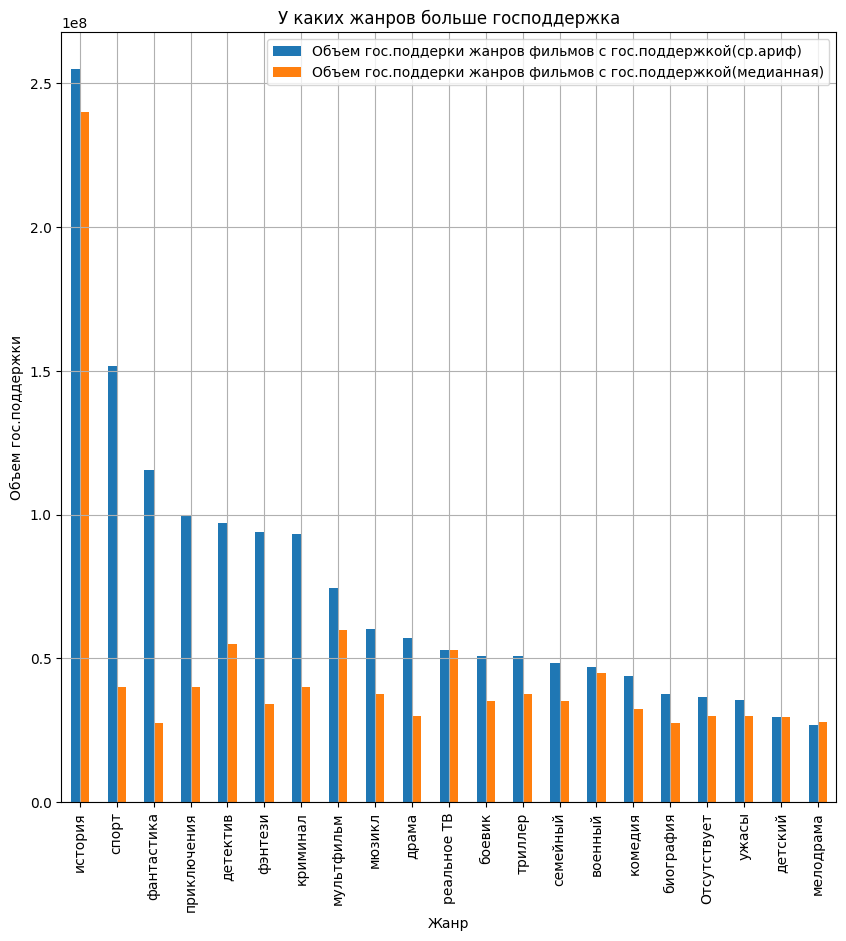

,mean_%_gospod,median_%_gospod
main_genre,,
реальное ТВ,66.250,66.250
криминал,65.553,65.625
детский,64.875,66.723
ужасы,63.224,64.164
Отсутствует,62.224,65.000
триллер,55.877,60.401
фэнтези,55.340,62.500
драма,54.396,62.018
спорт,54.028,50.000


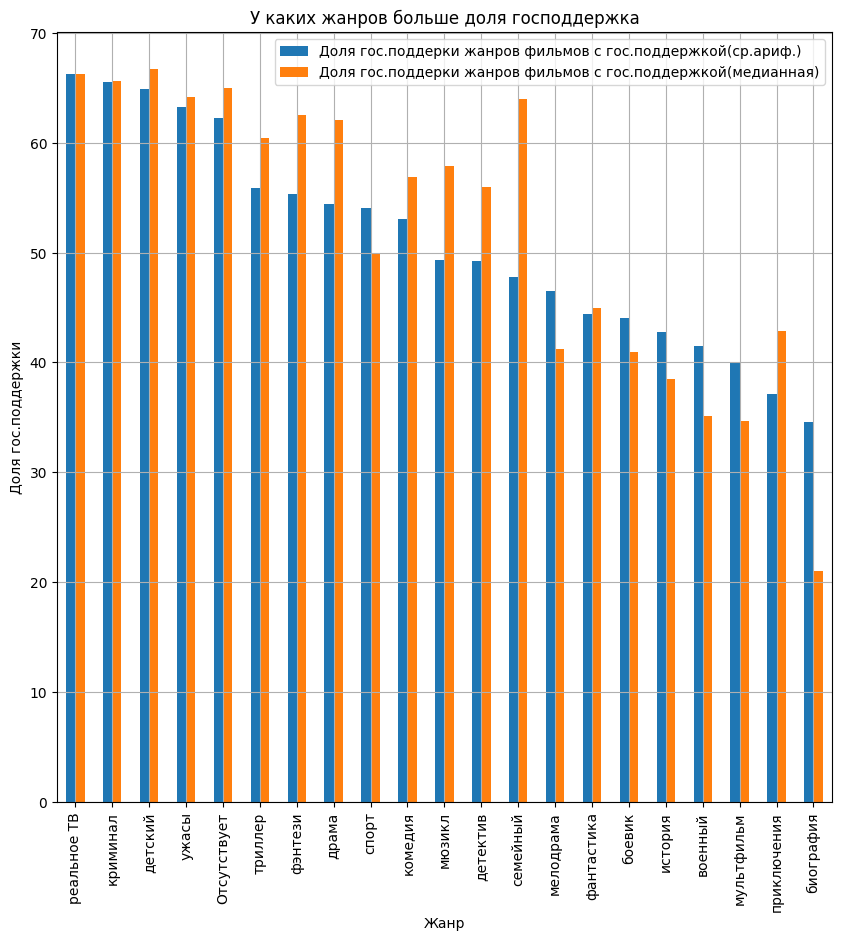

,mean_main_genre,median_main_genre
main_genre,,
Отсутствует,253.671,38.898
биография,8.629,0.526
боевик,33.100,0.887
военный,4.975,1.980
детектив,157.275,6.528
детский,200.103,25.576
драма,142.843,8.844
история,1.645,0.819
комедия,18.258,1.412


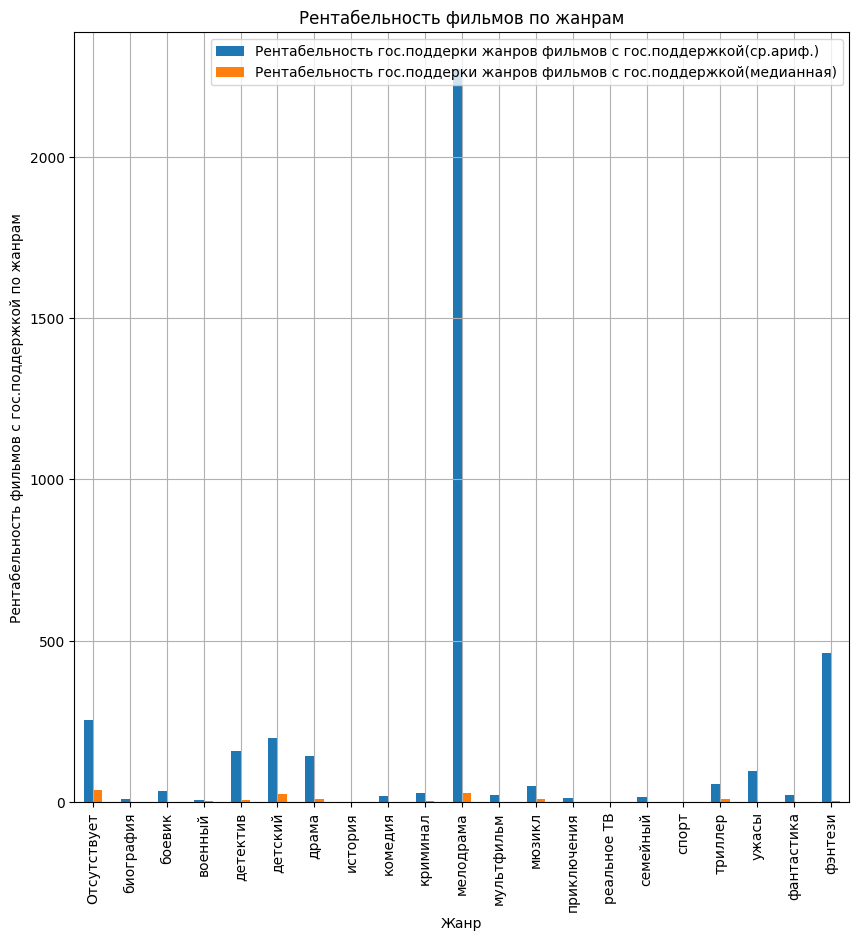

In [118]:
#у каких жанров больше рейтинг
genre_reiting=inform_gos_pod.pivot_table(index='main_genre', values='ratings', aggfunc=['mean','median'])
genre_reiting.columns=['mean_ratings','median_ratings']
genre_reiting=genre_reiting.sort_values(by='mean_ratings',ascending=False)
display(genre_reiting.head(15))
genre_reiting.plot(y=['mean_ratings','median_ratings'], kind='bar',figsize=(10,10), title='У каких жанров выше рейтинг',
ylabel='Рейтинг жанров',xlabel = 'Жанр',legend=True, grid=True, label=['Рейтинги жанров фильмов с гос.поддержкой(ср.ариф)','Рейтинги жанров фильмов с гос.поддержкой(медианная)'])
plt.show()


#у каких жанров больше сборов
genre_sbor=inform_gos_pod.pivot_table(index='main_genre', values='box_office', aggfunc=['mean','median'])
genre_sbor.columns=['mean_box_office','median_box_office']
genre_sbor=genre_sbor.sort_values(by='mean_box_office',ascending=False)
display(genre_sbor.head(15))
genre_sbor.plot(y=['mean_box_office','median_box_office'], kind='bar',figsize=(10,10), title='У каких жанров больше сборов',
ylabel='Сборы жанров',xlabel = 'Жанр',legend=True, grid=True, label=['Сборы жанров фильмов с гос.поддержкой(ср.ариф)','Сборы жанров фильмов с гос.поддержкой(медианная)'])
plt.show()


#у каких жанров больше господдержка
genre_gos_pod=inform_gos_pod.pivot_table(index='main_genre', values='total_gos_pod', aggfunc=['mean','median'])
genre_gos_pod.columns=['mean_total_gos_pod','median_total_gos_pod']
genre_gos_pod=genre_gos_pod.sort_values(by='mean_total_gos_pod',ascending=False)
display(genre_gos_pod.head(15))
genre_gos_pod.plot(y=['mean_total_gos_pod','median_total_gos_pod'], kind='bar',figsize=(10,10), title='У каких жанров больше господдержка',
ylabel='Объем гос.поддержки',xlabel = 'Жанр',legend=True, grid=True, label=['Объем гос.поддерки жанров фильмов с гос.поддержкой(ср.ариф)','Объем гос.поддерки жанров фильмов с гос.поддержкой(медианная)'])
plt.show()


#у каких жанров больше доля господдержка
genre_gos_pod_dolya=inform_gos_pod.pivot_table(index='main_genre', values='%_gospod', aggfunc=['mean','median'])
genre_gos_pod_dolya.columns=['mean_%_gospod','median_%_gospod']
genre_gos_pod_dolya=genre_gos_pod_dolya.sort_values(by='mean_%_gospod',ascending=False)
display(genre_gos_pod_dolya.head(15))
genre_gos_pod_dolya.plot(y=['mean_%_gospod','median_%_gospod'], kind='bar',figsize=(10,10), title='У каких жанров больше доля господдержка',
ylabel='Доля гос.поддержки',xlabel = 'Жанр',legend=True, grid=True, label=['Доля гос.поддерки жанров фильмов с гос.поддержкой(ср.ариф.)','Доля гос.поддерки жанров фильмов с гос.поддержкой(медианная)'])
plt.show()

#вывод графика рентабельности фильмов по жанрам
rent_data_genre=inform_gos_pod.pivot_table(index='main_genre', values='rent_film', aggfunc=['mean','median'])
rent_data_genre.columns=['mean_main_genre','median_main_genre']
display(rent_data_genre)
rent_data_genre.plot(y=['mean_main_genre','median_main_genre'], kind='bar',figsize=(10,10), title='Рентабельность фильмов по жанрам',
ylabel='Рентабельность фильмов с гос.поддержкой по жанрам',xlabel = 'Жанр',legend=True, grid=True,
label=['Рентабельность гос.поддерки жанров фильмов с гос.поддержкой(ср.ариф.)','Рентабельность гос.поддерки жанров фильмов с гос.поддержкой(медианная)'])
plt.show()



**Вывод** В части средней арифметической:  
самый высокий рейтинг достигнут по жанру "криминал", на втором месте "детский". Минимум приходится на "триллер".  
Больше всего сборов приходится на "спорт", на втором месте (причем наблюдается резкий спад)-"история". Крайний в данном рейтинге - "детский".
Больше всего гос.поддержки приходится на категорию история, минимальное -мелодрама. Второй в рейтинге объема господдержки – спорт.
При этом наибольшая доля гос.поддержки приходится на категорию реальное ТВ. Далее график плавно но уверенно идет к минимальному значению – биография (однако небольшой спад отмечен на категории триллер).
Максимальная рентабельность приходится на категорию мелодрама, на втором месте – фэнтези (при этом спад с максимального значения колоссальный). Минимальное значение соответствует спорт.  
В части медианных значений:  
Пик достигнут в категории «криминал» - аналогично средней арифметическим значениям – на втором месте фэнтези. При этом график достаточно плавный, и к одному из минимальных значений – ужасы –  идет на спад. При этом имеется провал, он же минимальный показатель – семейный.
Пик по сборам приходится на категорию история (показатель полностью совпадает со средним арифметическим), при этом минимальные значения – детский и мелодрама. При этом график неоднородный и имеется множество всплесков.
Наибольший объем пришелся на категорию история (аналогично средней арифметической), на втором месте-мультфильм и минимальное значение – фантастика.
Наибольшая доля гос.поддержки приходится на категорию детский, второй по значению/сопоставимым значением – семейный.  Минимальное значение приходится на биографию.
Максимальное значение рентабельности соответствует мелодраме, минимальное – биография.  
Отмечается, что в виду отсутствия данных и заполнения пропусков универсальными значениями – «Отсутствует», выборка искажена(на графике значимое значение приходится на «Отсутствует».)


#### Графики доли гос. поддержки и её объемов, рейтингов и суммы сборов по режиссерам

,mean_ratings,median_ratings
main_director,,
Ю.Кара,9.400,9.400
Н.Степанова при участии С.Иванова,9.000,9.000
Р.Прыгунов,8.200,8.200
А.Атанесян,8.100,8.100
А.Попова,8.000,8.000
К.Оганисян,7.900,7.900
В.Татарский,7.800,7.800
И.Шахназаров,7.800,7.800
А.Игудин,7.700,7.700


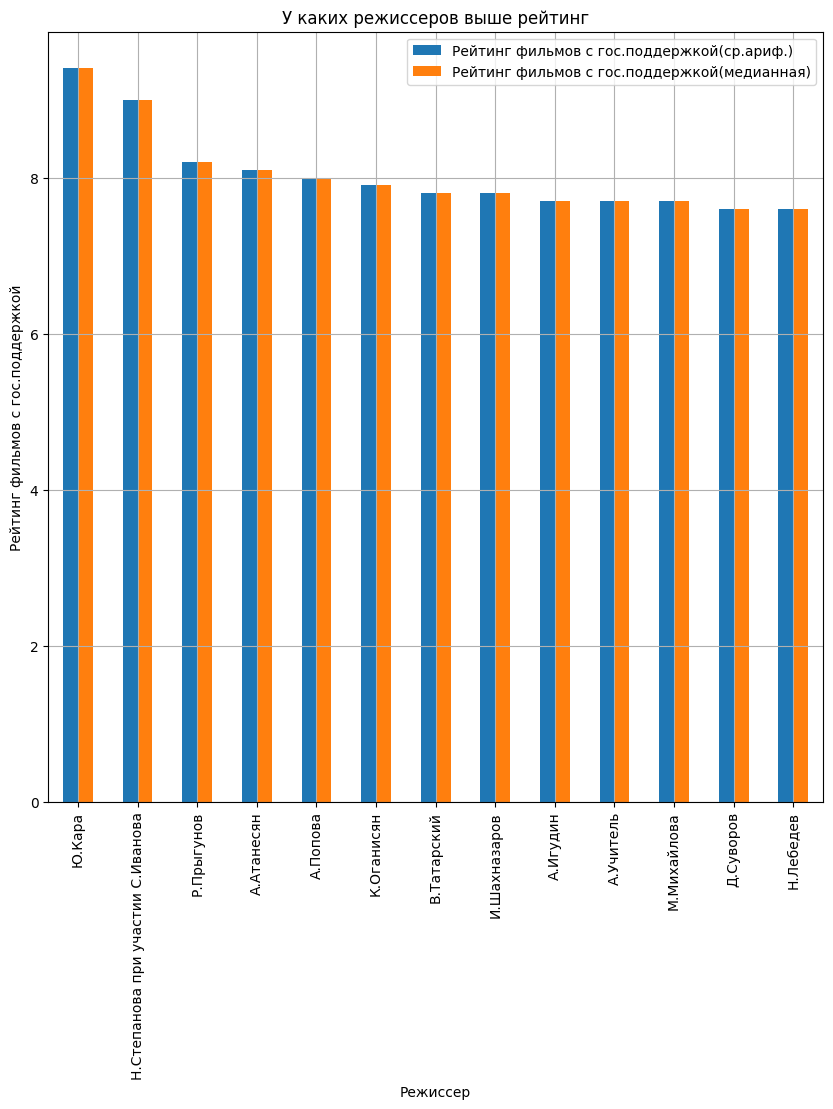

,mean_box_office,median_box_office
main_director,,
А.Мегердичев,"2,779,686,144.000","2,779,686,144.000"
А.Сидоров,"2,271,754,004.520","2,271,754,004.520"
О.Трофим,"1,445,731,797.890","1,445,731,797.890"
Н.Лебедев,"1,402,255,390.000","1,402,255,390.000"
К.Шипенко,"1,275,924,072.597","752,679,777.000"
Д.Козловский,"820,528,005.210","820,528,005.210"
К.Феоктистов,"759,226,773.000","759,226,773.000"
А.Кравчук,"717,703,185.530","717,703,185.530"
Д.Киселев,"699,891,656.000","699,891,656.000"


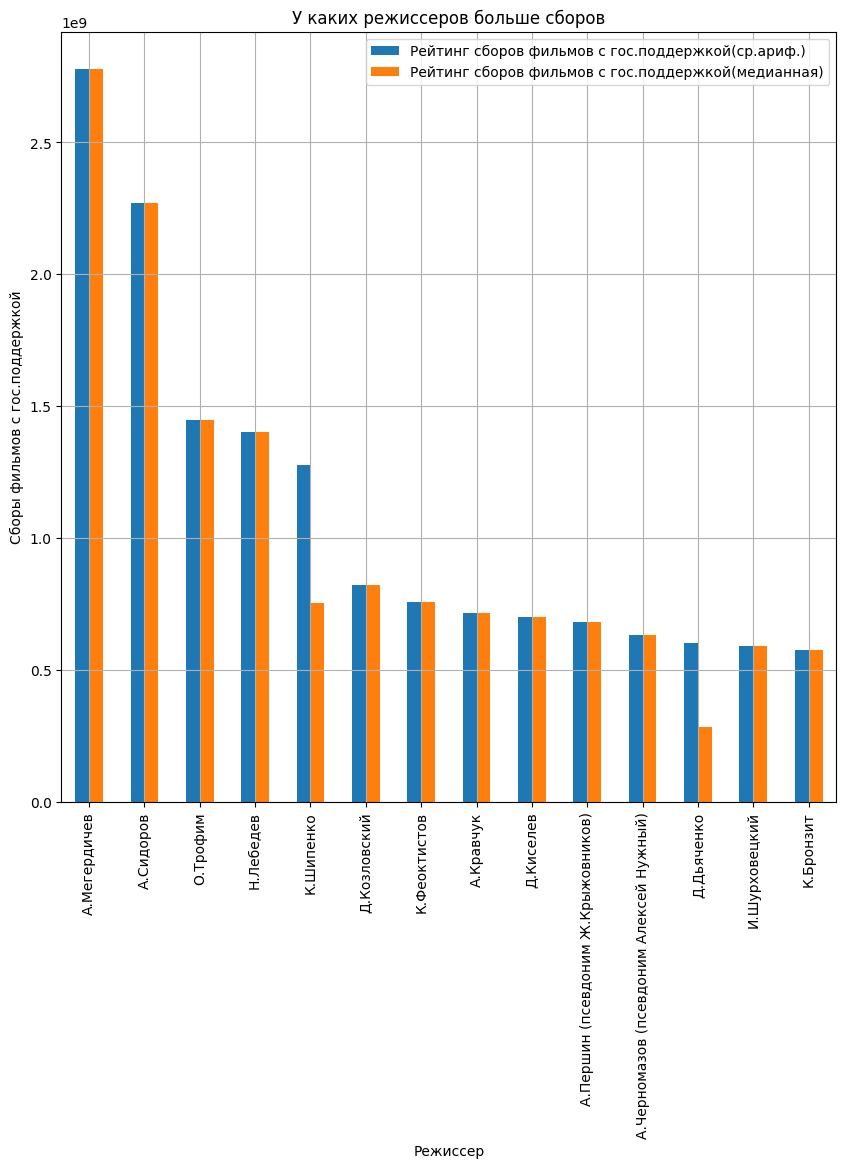

In [119]:
#у каких режиссеров больше рейтинг
director_reiting=inform_gos_pod.pivot_table(index='main_director', values='ratings', aggfunc=['mean','median'])
director_reiting.columns=['mean_ratings','median_ratings']
filt_director_reiting=director_reiting.query('mean_ratings>7.5').sort_values(by='mean_ratings',ascending=False)
display(filt_director_reiting.head(15))
filt_director_reiting.plot(y=['mean_ratings','median_ratings'], kind='bar',figsize=(10,10), title='У каких режиссеров выше рейтинг',
ylabel='Рейтинг фильмов с гос.поддержкой',xlabel = 'Режиссер',legend=True, grid=True,
label=['Рейтинг фильмов с гос.поддержкой(ср.ариф.)','Рейтинг фильмов с гос.поддержкой(медианная)'])
plt.show()

#у каких режиссеров больше сборов
director_sbor=inform_gos_pod.pivot_table(index='main_director', values='box_office', aggfunc=['mean','median'])
director_sbor.columns=['mean_box_office','median_box_office']
filt_director_sbor=director_sbor.query('mean_box_office>511775548').sort_values(by='mean_box_office',ascending=False)
display(filt_director_sbor.head(15))
filt_director_sbor.plot(y=['mean_box_office','median_box_office'], kind='bar',figsize=(10,10), title='У каких режиссеров больше сборов',
ylabel='Сборы фильмов с гос.поддержкой',xlabel = 'Режиссер',legend=True, grid=True,
label=['Рейтинг сборов фильмов с гос.поддержкой(ср.ариф.)','Рейтинг сборов фильмов с гос.поддержкой(медианная)'])
plt.show()

**Вывод** Исходя из графика, как по средней арифметической, так и по медианным значениям – «пальма первенства» по части рейтинга фильмов принадлежит режиссеру Ю.Кара, далее Н.Степанова при участии С.Иванова. В целом по всей выборке, в графике не отмечено резких спадов/пиков, график равномерный.
В части сборов, средние арифметические и медианные практически совпадают (только у 2 режиссеров медианная меньше средней арифметической). Максимальное значение у Мегердичева А, второй – А.Сидоров.

,mean_total_gos_pod,median_total_gos_pod
main_director,,
А.Кравчук,"500,000,000.000","500,000,000.000"
Ф.Бондарчук,"500,000,000.000","500,000,000.000"
А.Мизгирев,"450,000,000.000","450,000,000.000"
Н.Лебедев,"442,104,482.000","442,104,482.000"
А.Мегердичев,"400,000,000.000","400,000,000.000"
И.Шурховецкий,"350,000,000.000","350,000,000.000"
Н.Хомерики,"300,000,000.000","300,000,000.000"
А.Учитель,"300,000,000.000","300,000,000.000"
О.Степченко,"270,000,000.000","270,000,000.000"


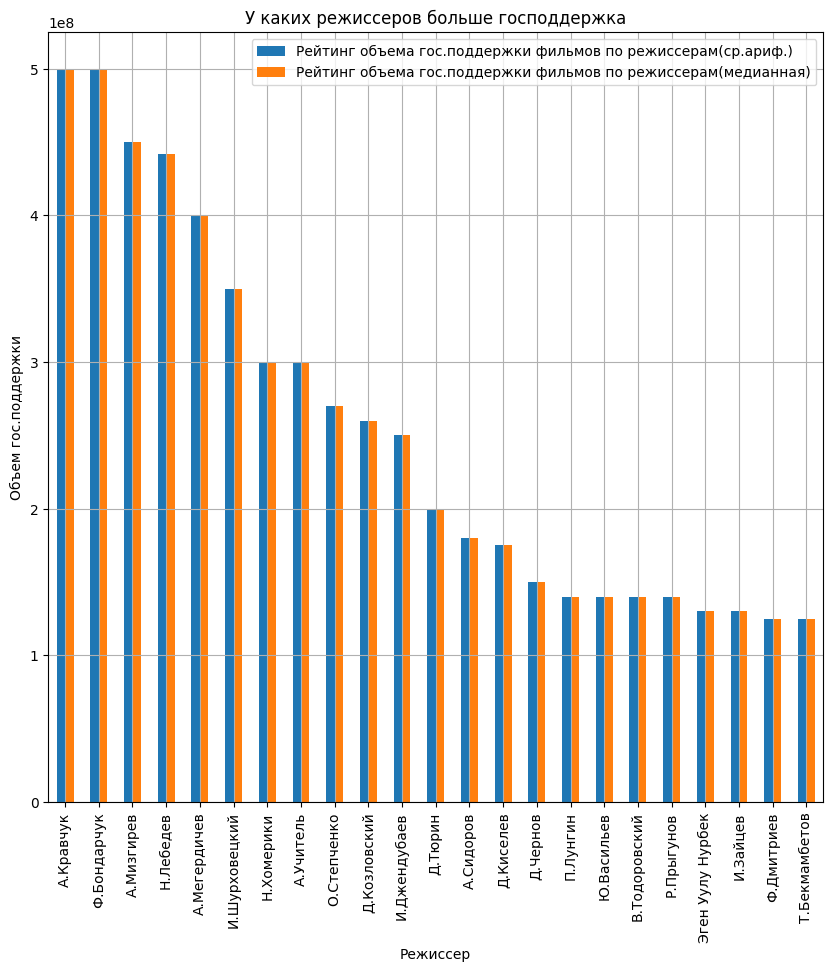

,mean_%_gospod,median_%_gospod
main_director,,
В.Бортко,78.475,78.475
Е.Татаров,70.000,70.000
Т.Воронецкая,70.000,70.000
А.Майовер,70.000,70.000
А.Соколов,70.000,70.000
Максим Свешников,70.000,70.000
Э.Архангельская,70.000,70.000
Р.Ильясов,70.000,70.000
Д.Федоров,70.000,70.000


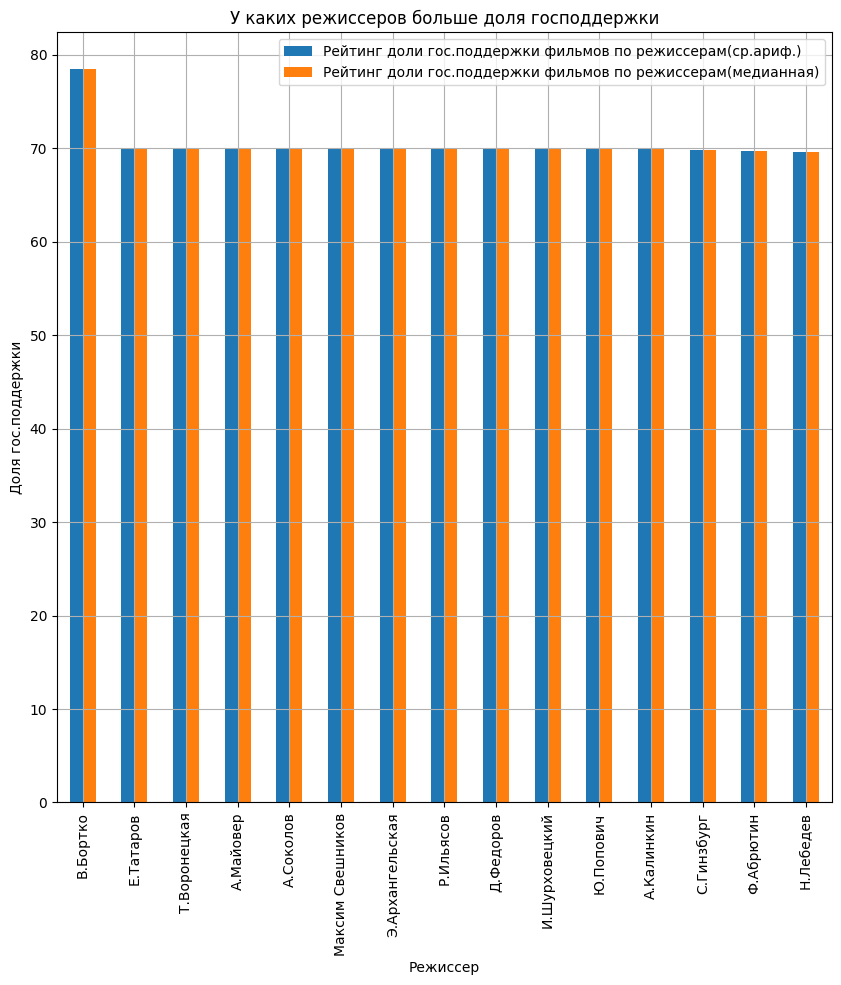

In [120]:
#у каких режиссеров больше господдержка
director_gos_pod=inform_gos_pod.pivot_table(index='main_director', values='total_gos_pod', aggfunc=['mean','median'])
director_gos_pod.columns=['mean_total_gos_pod','median_total_gos_pod']
director_gos_pod=director_gos_pod.sort_values(by='mean_total_gos_pod',ascending=False)
filt_director_gos_pod=director_gos_pod.query('mean_total_gos_pod>120000000')
display(filt_director_gos_pod.head(15))
filt_director_gos_pod.plot(y=['mean_total_gos_pod','median_total_gos_pod'], kind='bar',figsize=(10,10), title='У каких режиссеров больше господдержка',
ylabel='Объем гос.поддержки',xlabel = 'Режиссер',legend=True, grid=True,
label=['Рейтинг объема гос.поддержки фильмов по режиссерам(ср.ариф.)','Рейтинг объема гос.поддержки фильмов по режиссерам(медианная)'])
plt.show()

#у каких режиссеров больше доля господдержка
main_director_gos_pod_dolya=inform_gos_pod.pivot_table(index='main_director', values='%_gospod', aggfunc=['mean','median'])
main_director_gos_pod_dolya.columns=['mean_%_gospod','median_%_gospod']
main_director_gos_pod_dolya=main_director_gos_pod_dolya.sort_values(by='mean_%_gospod',ascending=False)
filt_main_director_gos_pod_dolya=main_director_gos_pod_dolya.loc[main_director_gos_pod_dolya['mean_%_gospod']>69.5]
display(filt_main_director_gos_pod_dolya.head(15))
filt_main_director_gos_pod_dolya.plot(y=['mean_%_gospod','median_%_gospod'], kind='bar',figsize=(10,10), title='У каких режиссеров больше доля господдержки',
ylabel='Доля гос.поддержки',xlabel = 'Режиссер',legend=True, grid=True,
label=['Рейтинг доли гос.поддержки фильмов по режиссерам(ср.ариф.)','Рейтинг доли гос.поддержки фильмов по режиссерам(медианная)'])
plt.show()

In [121]:
#дополнительный вывод описания рейтингов фильмов по режиссеров
filt_main_director_gos_pod_dolya.describe()

,mean_%_gospod,median_%_gospod
count,15.000,15.000
mean,70.505,70.505
std,2.208,2.208
min,69.592,69.592
25%,69.953,69.953
50%,70.000,70.000
75%,70.000,70.000
max,78.475,78.475


**Вывод** Исходя из графика у всех режиссеров, по средним арифметическим и медианным значения совпадают. При этом максимальное значение у А.Кравчук и Ф.Бондарчук (одинаковое значение). При этом доля гос поддержки больше всего у В. Бортко, у остальных режиссеров в выборке примерно одинаковый уровень.

,mean_rent_film,median_rent_film
main_director,,
С.Мокрицкий,"7,527.133",0.686
Н.Джорджадзе,"5,955.056","5,955.056"
И.Кордзаия,"4,316.667","4,316.667"
А.Котт,"1,952.702",287.684
К.Сухарьков,"1,261.352","1,261.352"
В.Татарский,"1,089.918","1,089.918"
А.Соколов,837.607,837.607
К.Геворкян,835.724,835.724
Ф.Абрютин,749.064,749.064


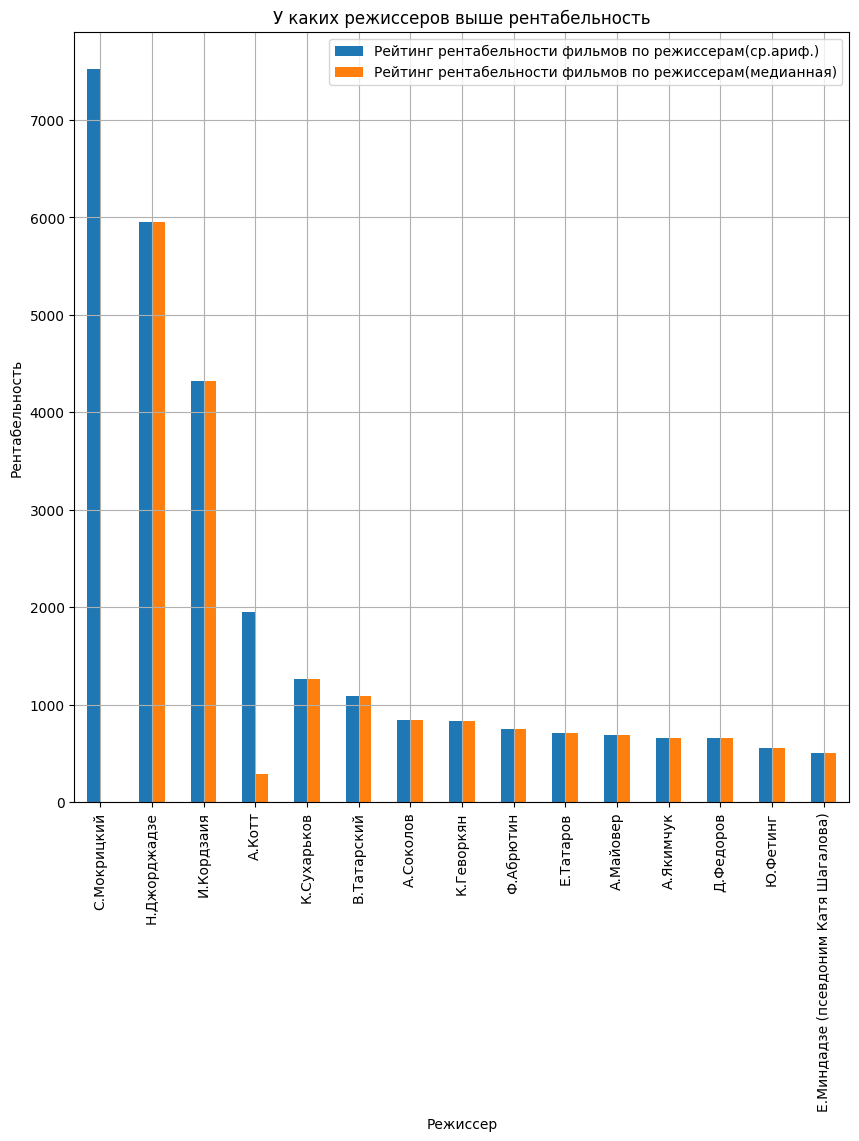

In [122]:
#рентабельность фильмов с гос.поддержкой по режиссерам
rent_director_gos_pod=inform_gos_pod.pivot_table(index='main_director', values='rent_film', aggfunc=['mean','median'])
rent_director_gos_pod.columns=['mean_rent_film','median_rent_film']
rent_director_gos_pod=rent_director_gos_pod.sort_values(by='mean_rent_film',ascending=False)
#display(rent_director_gos_pod.head(15))
filt_rent_director_gos_pod=rent_director_gos_pod.query('mean_rent_film>500')
display(filt_rent_director_gos_pod)

filt_rent_director_gos_pod.plot(y=['mean_rent_film','median_rent_film'], kind='bar',figsize=(10,10), title='У каких режиссеров выше рентабельность',
ylabel='Рентабельность',xlabel = 'Режиссер',legend=True, grid=True,
label=['Рейтинг рентабельности фильмов по режиссерам(ср.ариф.)','Рейтинг рентабельности фильмов по режиссерам(медианная)'])
plt.show()

**Вывод** В части рентабельности фильмов по режиссерам – лидером по среднеарифметическому показателю является Мокрицкий С., и он же имеет минимальный показатель по медианным значениям. При этом дополнительно у А.Котт показатели по средней арифметической и медианными различаются, у других режиссеров нет. Второе место по среднеарифметическому показателю, а медианный- максимальный, принадлежит Н.Джорджадзе.

**Вывод**  
В части касающейся средней арифметической:  
Больше всего был "профинансирован" государством 2017г. На втором месте 2016г. и почти на одном уровне - 2019г. При этом данные полностью совпадают с выводами о "известности" информации о гос.поддержке (аналогично, самым информативным является 2017г.)  
При этом доля гос.поддержки фильмов по годам находится примерно на одном уровне.  
Однако, рентабельность таких фильмов сильно различается: в 2015 пришелся пик рентабельности фильмов (2015г. занимает 2ое место по "известности" информации о сборах).  
Больше всего сборов пришлось на 2017 г. (самый информативный о сборах год.) и минимум приходится на 2013г. (он же самый ранний год, о котором есть информация о гос.поддержке в целом по выборке.  
В части рейтинга фильмов с гос поддержкой: самый высокий средний рейтинг приходится на 2013 г. (6,7), далее рейтинги находились примерно на одном уровне (от 5.6 (самый миниум, достигнутый в 2016г.) до 6.1)  
Самый высокий рейтинг достигнут по жанру "криминал", на втором месте "детский". Минимум приходится на "триллер".  
Больше всего сборов приходится на "спорт", на втором месте (причем наблюдается резкий спад)-"история". Крайний в данном рейтинге - "детский".
Больше всего гос.поддержки приходится на категорию история, минимальное -мелодрама. Второй в рейтинге объема господдержки – спорт.
При этом наибольшая доля гос.поддержки приходится на категорию реальное ТВ. Далее график плавно но уверенно идет к минимальному значению – биография (однако небольшой спад отмечен на категории триллер).
Максимальная рентабельность приходится на категорию мелодрама, на втором месте – фэнтези (при этом спад с максимального значения колоссальный). Минимальное значение соответствует спорт.  
  
В части касающейся медианных значений:  
По данным графика об объемах гос.поддержки: только в 2013 году данные по медианным и средней арифметической совпадают (наиболее вероятно это влияние малочисленностью выборки). При этом пик приходится на 2017 год, и на втором месте 2019 год (при этом тренд с 2014 по 2019 -планомерное увеличение объемов гос поддержки).
Рентабельность фильмов с гос.поддержкой достигнув пика в 2013г. Уверенно снижается на протяжении с 2014-2019 гг. При этом доля гос.поддерджки за весь период находится примерно на одном уровне.  
Пик сборов приходится на 2017г. (самый «известный» год в части касающейся сборов), при этом самым минимальным является 2015г. В целом наблюдается волнообразный график с почти минимальных значений 2014-2015гг до2017г. тренд был положительным, при этом с 2017-2019гг. тренд меняется в сторону отрицательных значений и график идёт на убывание.
В части касающейся рейтингов, график почти аналогичен средней арифметическим значениям.  
Пик достигнут в категории «криминал» - аналогично средней арифметическим значениям – на втором месте фэнтези. При этом график достаточно плавный, и к одному из минимальных значений – ужасы –  идет на спад. При этом имеется провал, он же минимальный показатель – семейный.
Пик по сборам приходится на категорию история (показатель полностью совпадает со средним арифметическим), при этом минимальные значения – детский и мелодрама. При этом график неоднородный и имеется множество всплесков.
Наибольший объем пришелся на категорию история (аналогично средней арифметической), на втором месте-мультфильм и минимальное значение – фантастика.
Наибольшая доля гос.поддержки приходится на категорию детский, второй по значению/сопоставимым значением – семейный.  Минимальное значение приходится на биографию.
Максимальное значение рентабельности соответствует мелодраме, минимальное – биография.  
Отмечается, что в виду отсутствия данных и заполнения пропусков универсальными значениями – «Отсутствует», выборка искажена(на графике значимое значение приходится на «Отсутствует».)  
В целом по выборке:  
Исходя из графика, как по средней арифметической, так и по медианным значениям – «пальма первенства» по части рейтинга фильмов принадлежит режиссеру Ю.Кара, далее Н.Степанова при участии С.Иванова. В целом по всей выборке, в графике не отмечено резких спадов/пиков, график равномерный.
В части сборов, средние арифметические и медианные практически совпадают (только у 2 режиссеров медианная меньше средней арифметической). Максимальное значение у Мегердичева А, второй – А.Сидоров.  
Исходя из графика у всех режиссеров, по средним арифметическим и медианным значения совпадают. При этом максимальное значение у А.Кравчук и Ф.Бондарчук (одинаковое значение). При этом доля гос поддержки больше всего у В. Бортко, у остальных режиссеров в выборке примерно одинаковый уровень.  
В части рентабельности фильмов по режиссерам – лидером по среднеарифметическому показателю является Мокрицкий С., и он же имеет минимальный показатель по медианным значениям. При этом дополнительно у А.Котт показатели по средней арифметической и медианными различаются, у других режиссеров нет. Второе место по среднеарифметическому показателю, а медианный- максимальный, принадлежит Н.Джорджадзе.  
    В целом, общий вывод свидетельствует о том, насколько неоднородна выборка и насколько сильно влияет отсуствие информации на анализ. Для наиболее информативного вывода и анализа необходимо больше данных. При этом прослеживается популярность жанра мелодрама, а также отслеживаается тенденция к финансированию жанров итория, детский, спорт и семейное кино государством (вероятно сказывается программа "прививание" населению любовь к спорту, воспитание патриотических\семейных ценностей и знание к истории. На практике, наиболее частно именно государство является спонсором детских и исторических фильмов/сериалов и т.д., которые редко являются рентабельными).

### Шаг 5. Напишите общий вывод

При открытии 2 файлов с данными, обнаружены 2 data с общей колонкой puNumber (номер прокатного удостоверения). Предполагается, что значения в данном столбце являются уникальным/индификатором каждого фильма. По этой колонке было сделано объединение 2 data в 1.
Обнаружны пропуски в film_studio, production_country,director, producer, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres и box_office. В некоторых колонках ilm_studio, production_country,director, producer, пропусков не так много, но и значения восстановить невозможно - предлагается удалить строки с пропусками. По остальным колонкам - пропусков слишком много, чтобы удалять. Возможно, пропуски остануться.
По ряду колонок show_start_date и ratings необходимо скорректировать типы данных (в datetime и float соответственно)  
Исходя из данных о размерах исходящих данных, в процессе объединения данные не были утеряны.
Данные в show_start_date были переведены из object в datetime (т.к. это данные времени, и вероятнее всего они понадобятся в работе далее, и для корректной работы необходимо перевести в корректный формат) данные в ratings были переведены в float (значения типа 99% были переведы в 9.9, т.к. предположительно при введении данных была допущена техническая ошибка).  
Обнаружны пропуски в film_studio, production_country,director, producer, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres и box_office. В некоторых колонках film_studio, production_country,director, producer, пропусков не так много, но и значения восстановить невозможно - предлагается заполнить "условными" значениями, для использования информации из строк для иссследований  
Предполагается, что если гос поддержки не было, то пропуски можно заполнить значениями 0 в nonrefundable_support и refundable_support. Предположительно, что если гос поддержки нет, то и в financing_source также будет значение 'Отсутствует' (пропуски были устранены) Пропуски в budget составляют почти весь data, поэтому удалить такие данные невозможно, но и заполнить невозможно. Прийдется оставить как есть. Также в части в box_office
Данные по ratings и genres восстановить невозможно, пришлось заполнить "условными" значениями как "Отсутствует"
Обнаружены дубликаты в puNumber.Дубликат возможно произошел по технической ошибке из-за двойной записи данных (или человеческой, при случайном копировании). Есть дубликаты по названию фильма title, но удаление таких данных, при условии разных значений в puNumber (там дубликатов больше не обнаружено), влечет потерю данных, т.к. возможно фильмы показывались иным способом (по ТВ, в кинотеатре и т.д.), возможно были выпущены ремейки и т.д. (т.е. в любом случае, это разные фильмы с одиннаковыми наименованиями)  
В колонке type были обнаружены лишние пробелы. Пробелы удалены.
При этом во всех данных обнаружена разная запись однородной информации, например в director некоторые имена были указаны например И.Иванов, а другие Вася Васечкин. Аналогично в producer. В title помимо названия могут быть вписаны "уточняющие данные" не предусмотренные графой, например Превосходство Борна /По одноименной новелле ... По всем категориальным данным была произведена корректировка по удалению лишних пробелов вначале и в конце значения
Отмечено, что данные в budget имеются только для тех, которые имеют государственную поддержку (и данные только по таким фильмам есть в financing_source). Предполагается, что не может быть, что при бюджете 0, гос поддержка составила более 0 руб. Такие строки в data пришлось удалить  
Функцией были созданы 2 дополнительных столбца, в целях выделения "главных"(они же первые в списках) режиссера и жанра (main_director и main_genre) и подсчитана для каждого фильма(строки) какую долю от общего бюджета фильма составляет государственная поддержка.
Доля фильмов с информацией о сборах умеренно увеличивается на протяжениии заданного временого отрезка (2010-2019гг.). Минимальное значение достигнутое в 2010г. достаточно резко меняется до максимального в 2017г. но немного опять тренд снижается в 2018г., и опять увеличивается (немного) в 2019г. В целом, такая картина свидетельствует о том, что возможно из-за большого объема информации, данные о фильмах старше (условно) 7-10 лет постепенно стирается (для восвобождения свободного пространства для хранения новой "свежей информацией" и вероятно такая теория подтвержиться при рассмотрении кол-ва фильмов в целой выборке по годам и сравнение кол-во фильмов с инфо о сборах в единицах)  
Больше всего фильмов выходило в 2010 году. Самое минимальное кол-во фильмов выходило в 2017 г. При этом на всем протяжении (с 2010-2019гг.) в целом небольшой тренд на уменьшение кол-во выхода фильмов. Резкий подьем в 2010 сменился на резкое падение в 2011 г. и с тех пор выравнивался и увеличивался к 2019г., но все еще не достигнут пик 2010г. Для точного подтверждения тренда, нужно больше данных (хотя бы за 2020-2021 гг.возможно там фильмов выходило больше и в целом пик 2010 уже пройден).  
В части выхода в прокат- самым "известным по информации о сборах" оказался 2019 г.(немного отстал 2016г.), при этом самыми "неинформативными" оказались 2010 и 2011 год (но "пальма первенства" принадлежит 2010г.). И замечен в целом четкий тренд на увеличение информации о сборах (картину немного "омрачает" 2017 год, но общую картину при этом не меняет, тем более что 2017г. в процентном выражении самый "известный".)  
Помимо прочего, теория обозначенная ранее в исследовании (об удалении информации за давностью) в целом подтверждается (особенно заметно на пиках в 2010 г. (много фильмов-мало инфо) и в 2017 г. (мало фильмов-но доля фильмов с инфо больше). Однако, вероятно, что информацию не вносили по иным причинам.  
Максимальное значение сборов, он же самый прибыльный год - 2018 г., самый "убыточный" - 2010г. (и это на фоне самого высокого показателя наличия фильмов в выборке за этот год). Т.е. таким образом, можно предположить, что в выборке за 2010 г. указаны фильмы либо только те, которые "крутились" не в кинотеатре (по ТВ, поэтому сборов нет), либо информация о фильмах удаляется "за давностью лет", либо и то и другое.  
Исходя из данных сборов по медианной, самый прибыльный оказался 2017 г., и второе место - 2018, и самые минимальные показатели приходятся на период с 2010 по 2014 гг. (на фоне показателей 2014-2019 не отображается из-за низких показателей)  
Исходя из данных по средней. арифметической, самый прибыльный -2017, при этом 2016 и 2018г. хоть и на "втором" месте по прибыльности, однако не могут считаться сапоставимыми с 2017, и находится ближе к уровню с 2015 г и 2019г.
Немногим лучше показался 2014 год.
Можно сделать вывод, что в целом выборка неоднородна, т.к. данные слишком искажаются (слишком много отсутствующей информации)  
Разница между медианными и среднеарифметическими значениями колоссальная. Связано это прежде всего с неоднородностью данных (которые легко принять за выбросы). Разные фильмы по-разному "приносили" сборы, поэтому, с учетом определения медианной - отсекается "поровну" значения - и средней арифметической - учет всех значений и деление на кол-во - средняя арифметическая учитывает "всплески" и "сглаживает" показатели, но учитывает все показатели, при этом медианная - почти как середина - не учитывает возможные всплески. Медианная была бы уместна и информативнее, при условии наличия более 80% информации по всей выборке, равномерно по всем годам. Однако, с учетом того, что фильмы творческая деятельность, в любом случае, "приведение" показателей "под один стандарт" был бы затруднителен. Сборы в таком случае, все же лучше смотреть по средней арифметической ( которая сглаживает, в т.ч. и провальные показы и показы по ТВ, сборов с которых, предполагается, нет).  
В 2015 году больше всего сборов в категории старше 12 лет, и минимальное - для любой возрастной категории. При этом в 2016 больше сборов было собрано в категории старше 16 лет, по прежнему минимально в категории "для любой возрастной категории", при этом в категории "запрещено для детей" - немногим больше объем в сравнении с 2015 г. Тренд на снижение сборов в категории 12+ продолжается в 2017г.(небольшой пик достигнут в 2018г. и потом снова снижение в 2019г.) Для категории старше 16 - также максимальное значение (и в целом максимальное значение сборов по всему периоду по всем ограничениям), и ничего не меняется для категории 0+. В 2018 г. в категории 0+ опять минимум сборов, при этом в категории 12+ сборов стало больше относительно предыдущего года (немногим больше в сравнении с 2016г.) В 2019г. по категориям 6+, 12+,16+ - сапоставимо, небольшой "провал" в категории 18+ (максимальное в категории 16+), и минимальное 0+.  
Предполагается, что на такие колебания влияет в первую очередь выборка (почти половина инфо о сборах отсуствует, и самый минимально известный 2017г. в выборке "имеет" пик по сборам в категории 16+(которая в целом является самой "прибыльной"). При этом подтверждается вывод о том, что в отличии, например, цен на недвижимость, где возможно отличить "выбросы" и/или некорреткные значения, сборы являются непредсказуемыми величинами, и как любая творческая деятельность может "выстрелить" а может и нет, отличить реальные ошибки и неточности в данных от "грандиозных успехов" - невозмозможно с помощью анализа числовых данных. В частности, этим и объясняется колоссальная разница между ср.арифметическими значениями и медианными.  
При этом в графике отчетливо видно как "взрослеет" аудитория (планомерное увеличение сборов в возрастных категориях "старше" и уменьшение сборов в категориях "младше").
В части касающейся средней арифметической:  
Больше всего был "профинансирован" государством 2017г. На втором месте 2016г. и почти на одном уровне - 2019г. При этом данные полностью совпадают с выводами о "известности" информации о гос.поддержке (аналогично, самым информативным является 2017г.)  
При этом доля гос.поддержки фильмов по годам находится примерно на одном уровне.  
Однако, рентабельность таких фильмов сильно различается: в 2015 пришелся пик рентабельности фильмов (2015г. занимает 2ое место по "известности" информации о сборах).  
Больше всего сборов пришлось на 2017 г. (самый информативный о сборах год.) и минимум приходится на 2013г. (он же самый ранний год, о котором есть информация о гос.поддержке в целом по выборке.  
В части рейтинга фильмов с гос поддержкой: самый высокий средний рейтинг приходится на 2013 г. (6,7), далее рейтинги находились примерно на одном уровне (от 5.6 (самый миниум, достигнутый в 2016г.) до 6.1)  
Самый высокий рейтинг достигнут по жанру "криминал", на втором месте "детский". Минимум приходится на "триллер".  
Больше всего сборов приходится на "спорт", на втором месте (причем наблюдается резкий спад)-"история". Крайний в данном рейтинге - "детский".
Больше всего гос.поддержки приходится на категорию история, минимальное -мелодрама. Второй в рейтинге объема господдержки – спорт.
При этом наибольшая доля гос.поддержки приходится на категорию реальное ТВ. Далее график плавно но уверенно идет к минимальному значению – биография (однако небольшой спад отмечен на категории триллер).
Максимальная рентабельность приходится на категорию мелодрама, на втором месте – фэнтези (при этом спад с максимального значения колоссальный). Минимальное значение соответствует спорт.  
  
В части касающейся медианных значений:  
По данным графика об объемах гос.поддержки: только в 2013 году данные по медианным и средней арифметической совпадают (наиболее вероятно это влияние малочисленностью выборки). При этом пик приходится на 2017 год, и на втором месте 2019 год (при этом тренд с 2014 по 2019 -планомерное увеличение объемов гос поддержки).
Рентабельность фильмов с гос.поддержкой достигнув пика в 2013г. Уверенно снижается на протяжении с 2014-2019 гг. При этом доля гос.поддерджки за весь период находится примерно на одном уровне.  
Пик сборов приходится на 2017г. (самый «известный» год в части касающейся сборов), при этом самым минимальным является 2015г. В целом наблюдается волнообразный график с почти минимальных значений 2014-2015гг до2017г. тренд был положительным, при этом с 2017-2019гг. тренд меняется в сторону отрицательных значений и график идёт на убывание.
В части касающейся рейтингов, график почти аналогичен средней арифметическим значениям.  
Пик достигнут в категории «криминал» - аналогично средней арифметическим значениям – на втором месте фэнтези. При этом график достаточно плавный, и к одному из минимальных значений – ужасы –  идет на спад. При этом имеется провал, он же минимальный показатель – семейный.
Пик по сборам приходится на категорию история (показатель полностью совпадает со средним арифметическим), при этом минимальные значения – детский и мелодрама. При этом график неоднородный и имеется множество всплесков.
Наибольший объем пришелся на категорию история (аналогично средней арифметической), на втором месте-мультфильм и минимальное значение – фантастика.
Наибольшая доля гос.поддержки приходится на категорию детский, второй по значению/сопоставимым значением – семейный.  Минимальное значение приходится на биографию.
Максимальное значение рентабельности соответствует мелодраме, минимальное – биография.  
Отмечается, что в виду отсутствия данных и заполнения пропусков универсальными значениями – «Отсутствует», выборка искажена(на графике значимое значение приходится на «Отсутствует».)  
В целом по выборке:  
Исходя из графика, как по средней арифметической, так и по медианным значениям – «пальма первенства» по части рейтинга фильмов принадлежит режиссеру Ю.Кара, далее Н.Степанова при участии С.Иванова. В целом по всей выборке, в графике не отмечено резких спадов/пиков, график равномерный.
В части сборов, средние арифметические и медианные практически совпадают (только у 2 режиссеров медианная меньше средней арифметической). Максимальное значение у Мегердичева А, второй – А.Сидоров.  
Исходя из графика у всех режиссеров, по средним арифметическим и медианным значения совпадают. При этом максимальное значение у А.Кравчук и Ф.Бондарчук (одинаковое значение). При этом доля гос поддержки больше всего у В. Бортко, у остальных режиссеров в выборке примерно одинаковый уровень.  
В части рентабельности фильмов по режиссерам – лидером по среднеарифметическому показателю является Мокрицкий С., и он же имеет минимальный показатель по медианным значениям. При этом дополнительно у А.Котт показатели по средней арифметической и медианными различаются, у других режиссеров нет. Второе место по среднеарифметическому показателю, а медианный- максимальный, принадлежит Н.Джорджадзе.  
    В целом, общий вывод свидетельствует о том, насколько неоднородна выборка и насколько сильно влияет отсуствие информации на анализ. Для наиболее информативного вывода и анализа необходимо больше данных. При этом прослеживается популярность жанра мелодрама, а также отслеживаается тенденция к финансированию жанров итория, детский, спорт и семейное кино государством (вероятно сказывается программа "прививание" населению любовь к спорту, воспитание патриотических\семейных ценностей и знание к истории. На практике, наиболее частно именно государство является спонсором детских и исторических фильмов/сериалов и т.д., которые редко являются рентабельными).